# HomeWork 3

# Problem 1

## Part a)

In [2]:
import numpy as np
A = np.array([[0,0,1,1,0],
               [0,0,1,0,0],
               [0,0,0,0,1],
               [1,0,0,0,1],
               [0,0,0,0,0]
                ])
C = A.T@A
C

array([[1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 2, 1, 0],
       [0, 0, 1, 1, 0],
       [1, 0, 0, 0, 2]])

# Problem 2

In [7]:
import pandas as pd
import networkx as nx
phases = {}
G = {}
for i in range(1,12): 
  print(f'Phase {i}')
  var_name = "phase" + str(i)
  file_name = var_name + ".csv"
  #phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i] = pd.read_csv(file_name, index_col = 0)
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

Phase 1
Phase 2
Phase 3
Phase 4
Phase 5
Phase 6
Phase 7
Phase 8
Phase 9
Phase 10
Phase 11


## Part A)

### Question 1

In [16]:
for i in range(len(G)):
    print(f'In Fase {i+1} that Nodes: {len(G[i+1].nodes())} and Edges:  {len(G[i+1].edges(data=True))}') # data=True to see attributes

In Fase 1 that Nodes: 15 and Edges:  18
In Fase 2 that Nodes: 24 and Edges:  28
In Fase 3 that Nodes: 33 and Edges:  56
In Fase 4 that Nodes: 33 and Edges:  48
In Fase 5 that Nodes: 32 and Edges:  39
In Fase 6 that Nodes: 27 and Edges:  47
In Fase 7 that Nodes: 36 and Edges:  49
In Fase 8 that Nodes: 42 and Edges:  58
In Fase 9 that Nodes: 34 and Edges:  44
In Fase 10 that Nodes: 42 and Edges:  50
In Fase 11 that Nodes: 41 and Edges:  50


Network Evolution Table:
    Phase  Nodes  Edges
0       1     15     18
1       2     24     28
2       3     33     56
3       4     33     48
4       5     32     39
5       6     27     47
6       7     36     49
7       8     42     58
8       9     34     44
9      10     42     50
10     11     41     50


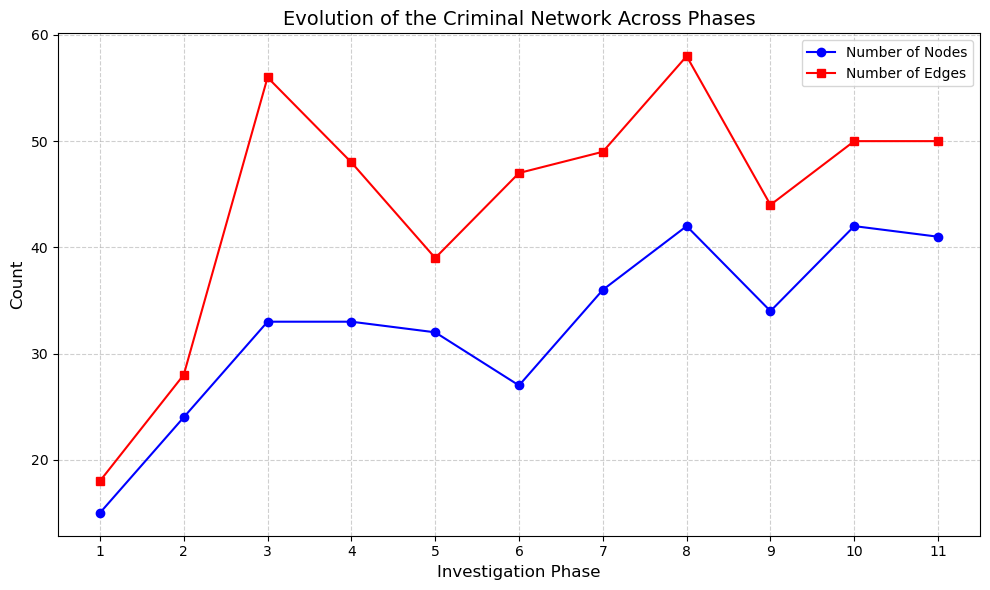

In [15]:
import matplotlib.pyplot as plt
import pandas as pd # Make sure to import pandas for the DataFrame and printing

phases = []
nodes = []
edges = []

# 2. Modify the loop to collect data
# len(G) will be 11 if G is indexed from 1 to 11
for i in range(len(G)):
    current_phase = i + 1
    
    # Assume G is indexed from 1 (G[1], G[2], etc.)
    current_graph = G[current_phase] 
    
    num_nodes = len(current_graph.nodes())
    # data=True is not necessary to simply count the edges
    num_edges = len(current_graph.edges()) 

    # Store in lists
    phases.append(current_phase)
    nodes.append(num_nodes)
    edges.append(num_edges)

# Optional: Create a DataFrame for better handling and table visualization
df_network = pd.DataFrame({
    'Phase': phases,
    'Nodes': nodes,
    'Edges': edges
})
print("Network Evolution Table:")
print(df_network.to_string())

# 3. Plot the collected data
plt.figure(figsize=(10, 6))

plt.plot(phases, nodes, marker='o', label='Number of Nodes', color='blue')
plt.plot(phases, edges, marker='s', label='Number of Edges', color='red')

plt.title('Evolution of the Criminal Network Across Phases', fontsize=14)
plt.xlabel('Investigation Phase', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(phases)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()

### Question 2

Error: pygraphviz no está instalado o no se puede importar. Usando el diseño por defecto.


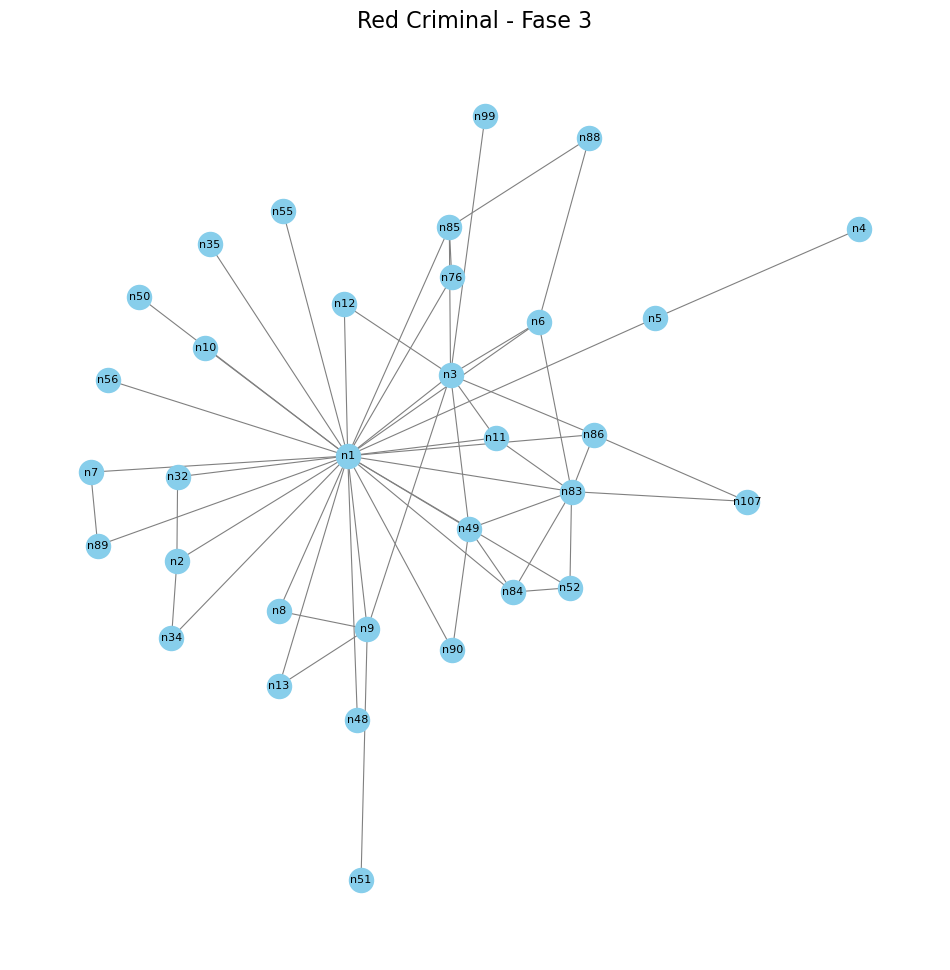

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Asegúrate de que G[3] existe y es un grafo NetworkX. 
# Si el código de carga anterior funcionó, G[3] estará disponible.
g3 = G[3]

# Definir la posición de los nodos usando el algoritmo Graphviz
# Esto proporciona un diseño más claro y estable para grafos complejos.
try:
    pos = nx.drawing.nx_agraph.graphviz_layout(g3, prog='dot')
except ImportError:
    # Fallback si pygraphviz no está instalado correctamente
    print("Error: pygraphviz no está instalado o no se puede importar. Usando el diseño por defecto.")
    pos = nx.spring_layout(g3)

# Configurar el gráfico
plt.figure(figsize=(12, 12)) 
plt.title("Red Criminal - Fase 3", fontsize=16)

# Usa la función nx.draw() para dibujar nodos, aristas y etiquetas
nx.draw(
    g3, 
    pos, 
    with_labels=True,        # Mostrar etiquetas de nodo (ej: 'n1')
    node_size=300,           # Tamaño de los nodos
    node_color='skyblue',    # Color de los nodos
    edge_color='gray',       # Color de las aristas
    font_size=8,             # Tamaño de la fuente de las etiquetas
    arrowsize=10,            # Tamaño de las flechas (importante para grafo dirigido)
    width=0.8                # Grosor de la línea
)

plt.show()

## Part b)

### Question 1

In [25]:
nodes_list = ['n1', 'n3', 'n12', 'n83']
phases = [3,9]

for i in phases:
    centrality = nx.degree_centrality(G[i])
    for node in nodes_list:
        node_centrality = centrality[node]
        print(f'Fase {i} and node {node} the centrality is {node_centrality:.4f}')


Fase 3 and node n1 the centrality is 0.8438
Fase 3 and node n3 the centrality is 0.2812
Fase 3 and node n12 the centrality is 0.0625
Fase 3 and node n83 the centrality is 0.2500
Fase 9 and node n1 the centrality is 0.3030
Fase 9 and node n3 the centrality is 0.3333
Fase 9 and node n12 the centrality is 0.2424
Fase 9 and node n83 the centrality is 0.0303


### Question 2

In [26]:
nodes_list = ['n1', 'n3', 'n12', 'n83']
phases = [3,9]

for i in phases:
    centrality = nx.betweenness_centrality(G[i], normalized = True)
    for node in nodes_list:
        node_centrality = centrality[node]
        print(f'Fase {i} and node {node} the centrality is {node_centrality:.4f}')

Fase 3 and node n1 the centrality is 0.8295
Fase 3 and node n3 the centrality is 0.0955
Fase 3 and node n12 the centrality is 0.0000
Fase 3 and node n83 the centrality is 0.0466
Fase 9 and node n1 the centrality is 0.2491
Fase 9 and node n3 the centrality is 0.5762
Fase 9 and node n12 the centrality is 0.3573
Fase 9 and node n83 the centrality is 0.0000


### Question 3

In [27]:
nodes_list = ['n1', 'n3', 'n12', 'n83']
phases = [3,9]

for i in phases:
    centrality = nx.eigenvector_centrality(G[i])
    for node in nodes_list:
        node_centrality = centrality[node]
        print(f'Fase {i} and node {node} the centrality is {node_centrality:.4f}')

Fase 3 and node n1 the centrality is 0.5939
Fase 3 and node n3 the centrality is 0.2913
Fase 3 and node n12 the centrality is 0.1360
Fase 3 and node n83 the centrality is 0.2775
Fase 9 and node n1 the centrality is 0.4590
Fase 9 and node n3 the centrality is 0.4680
Fase 9 and node n12 the centrality is 0.1407
Fase 9 and node n83 the centrality is 0.0918


### Question 5

#### Between Centrality

In [ ]:
dict = {}


In [5]:
import networkx as nx
import pandas as pd

# ----------------------------------------------------------------------
# 1. Asumimos que el diccionario G ya contiene los 11 grafos dirigidos (G[1] a G[11])
#    del paso de carga de datos anterior.
# ----------------------------------------------------------------------

# Lista de todos los 110 nodos. Dado que todos están en la matriz original,
# podemos tomar los nodos de una fase cualquiera (ej. G[1]) y añadir el prefijo 'n'.
# Si hay 110 jugadores (1-110), esta es la lista completa:
all_nodes = [f'n{i}' for i in range(1, 111)] 

num_phases = 11

# Diccionarios para almacenar la suma de centralidad a lo largo de las 11 fases
sum_betweenness = {node: 0.0 for node in all_nodes}
sum_eigenvector = {node: 0.0 for node in all_nodes}

# ----------------------------------------------------------------------
# 2. Iterar sobre las 11 Fases y Sumar Centralidades
# ----------------------------------------------------------------------

for i in range(1, num_phases + 1):
    if i not in G:
        print(f"Advertencia: El grafo G[{i}] no está cargado. Saltando fase.")
        continue

    # Calcular ambas centralidades en la fase actual
    # nx.betweenness_centrality() usa Brandes Algorithm (O(N*E))
    betweenness_centrality = nx.betweenness_centrality(G[i], normalized=True)
    
    # nx.eigenvector_centrality() usa Power Iteration (O(k*E))
    # Es crucial que el grafo esté cargado como nx.DiGraph
    try:
        eigenvector_centrality = nx.eigenvector_centrality(G[i], max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        # Si no converge, asignamos 0.0 (manejar la excepción)
        eigenvector_centrality = {node: 0.0 for node in G[i].nodes()}


    # Acumular las puntuaciones, aplicando 0 si el nodo no está en el resultado
    for node in all_nodes:
        # La función get(key, default) maneja el caso de que el nodo no tenga centralidad
        # (aunque en tu caso, el nodo puede tener 0.0 si está aislado, pero esto asegura)
        sum_betweenness[node] += betweenness_centrality.get(node, 0.0)
        sum_eigenvector[node] += eigenvector_centrality.get(node, 0.0)

# ----------------------------------------------------------------------
# 3. Calcular la Media y Encontrar los Top 3
# ----------------------------------------------------------------------

# Convertir las sumas a promedios dividiendo por el número de fases (11)
mean_betweenness = {node: total / num_phases for node, total in sum_betweenness.items()}
mean_eigenvector = {node: total / num_phases for node, total in sum_eigenvector.items()}


# Ordenar y obtener los 3 principales para Intermediación
top3_betweenness = sorted(mean_betweenness.items(), key=lambda item: item[1], reverse=True)[:3]

# Ordenar y obtener los 3 principales para Vector Propio
top3_eigenvector = sorted(mean_eigenvector.items(), key=lambda item: item[1], reverse=True)[:3]


# ----------------------------------------------------------------------
# 4. Imprimir los Resultados
# ----------------------------------------------------------------------

print("\n--- Centralidad de Intermediación Media (Top 3) ---")
print("Jugador | Media | Posición")
print("---------------------------------")
for rank, (node, mean_val) in enumerate(top3_betweenness):
    print(f"{node:<5} | {mean_val:.4f} | {rank + 1}")
    
# Para la respuesta del formulario:
print(f"\nRespuesta - Intermediación: 1º: {top3_betweenness[0][0]}, 2º: {top3_betweenness[1][0]}, 3º: {top3_betweenness[2][0]}")
print(f"Los jugadores son: {top3_betweenness[0][0][1:]}, {top3_betweenness[1][0][1:]}, {top3_betweenness[2][0][1:]}")


print("\n--- Centralidad de Vector Propio Media (Top 3) ---")
print("Jugador | Media | Posición")
print("---------------------------------")
for rank, (node, mean_val) in enumerate(top3_eigenvector):
    print(f"{node:<5} | {mean_val:.4f} | {rank + 1}")

# Para la respuesta del formulario:
print(f"\nRespuesta - Vector Propio: 1º: {top3_eigenvector[0][0]}, 2º: {top3_eigenvector[1][0]}, 3º: {top3_eigenvector[2][0]}")
print(f"Los jugadores son: {top3_eigenvector[0][0][1:]}, {top3_eigenvector[1][0][1:]}, {top3_eigenvector[2][0][1:]}")


--- Centralidad de Intermediación Media (Top 3) ---
Jugador | Media | Posición
---------------------------------
n1    | 0.6551 | 1
n12   | 0.1676 | 2
n3    | 0.1294 | 3

Respuesta - Intermediación: 1º: n1, 2º: n12, 3º: n3
Los jugadores son: 1, 12, 3

--- Centralidad de Vector Propio Media (Top 3) ---
Jugador | Media | Posición
---------------------------------
n1    | 0.5464 | 1
n3    | 0.2981 | 2
n85   | 0.1906 | 3

Respuesta - Vector Propio: 1º: n1, 2º: n3, 3º: n85
Los jugadores son: 1, 3, 85


In [4]:
all_nodes_set = set()
num_phases = 11

# Recopilar todos los nodos únicos de cada fase
for i in range(1, num_phases + 1):
    if i in G:
        all_nodes_set.update(G[i].nodes())
    else:
        # Esto se imprimirá si no has cargado phase2.csv a phase11.csv
        print(f"Advertencia: El grafo G[{i}] no está cargado y no se incluyeron sus nodos.")

# Función de ordenamiento personalizado:
# Esto garantiza que 'n10' vaya después de 'n9' (en lugar de después de 'n1').
def custom_sort_key(node_name):
    return int(node_name[1:]) 

# Convertir el conjunto a una lista y ordenar numéricamente por el ID del jugador
all_nodes = sorted(list(all_nodes_set), key=custom_sort_key)

print("\n--- Verificación de Jugadores ---")
print(f"Número total de jugadores únicos encontrados: {len(all_nodes)}")

# Mostrar los primeros y últimos nodos para verificar el rango (n1 a n110)
print(f"Primeros 10 nodos: {all_nodes[:10]}")
print(f"Últimos 10 nodos: {all_nodes[-10:]}")


--- Verificación de Jugadores ---
Número total de jugadores únicos encontrados: 107
Primeros 10 nodos: ['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10']
Últimos 10 nodos: ['n100', 'n101', 'n102', 'n103', 'n104', 'n105', 'n106', 'n107', 'n108', 'n109']


In [5]:
sum_betweenness = {node: 0.0 for node in all_nodes}
sum_eigenvector = {node: 0.0 for node in all_nodes}

# ----------------------------------------------------------------------
# 2. Iterar sobre las 11 Fases y Sumar Centralidades
# ----------------------------------------------------------------------

for i in range(1, num_phases + 1):
    if i not in G:
        print(f"Advertencia: El grafo G[{i}] no está cargado. Saltando fase.")
        continue

    # Calcular ambas centralidades en la fase actual
    # nx.betweenness_centrality() usa Brandes Algorithm (O(N*E))
    betweenness_centrality = nx.betweenness_centrality(G[i], normalized=True)
    
    # nx.eigenvector_centrality() usa Power Iteration (O(k*E))
    # Es crucial que el grafo esté cargado como nx.DiGraph
    try:
        eigenvector_centrality = nx.eigenvector_centrality(G[i], max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        # Si no converge, asignamos 0.0 (manejar la excepción)
        eigenvector_centrality = {node: 0.0 for node in G[i].nodes()}


    # Acumular las puntuaciones, aplicando 0 si el nodo no está en el resultado
    for node in all_nodes:
        # La función get(key, default) maneja el caso de que el nodo no tenga centralidad
        # (aunque en tu caso, el nodo puede tener 0.0 si está aislado, pero esto asegura)
        sum_betweenness[node] += betweenness_centrality.get(node, 0.0)
        sum_eigenvector[node] += eigenvector_centrality.get(node, 0.0)

# ----------------------------------------------------------------------
# 3. Calcular la Media y Encontrar los Top 3
# ----------------------------------------------------------------------

# Convertir las sumas a promedios dividiendo por el número de fases (11)
mean_betweenness = {node: total / num_phases for node, total in sum_betweenness.items()}
mean_eigenvector = {node: total / num_phases for node, total in sum_eigenvector.items()}


# Ordenar y obtener los 3 principales para Intermediación
top3_betweenness = sorted(mean_betweenness.items(), key=lambda item: item[1], reverse=True)[:7]

# Ordenar y obtener los 3 principales para Vector Propio
top3_eigenvector = sorted(mean_eigenvector.items(), key=lambda item: item[1], reverse=True)[:7]


# ----------------------------------------------------------------------
# 4. Imprimir los Resultados
# ----------------------------------------------------------------------

print("\n--- Centralidad de Intermediación Media (Top 3) ---")
print("Jugador | Media | Posición")
print("---------------------------------")
for rank, (node, mean_val) in enumerate(top3_betweenness):
    print(f"{node:<5} | {mean_val:.4f} | {rank + 1}")
    
# Para la respuesta del formulario:
print(f"\nRespuesta - Intermediación: 1º: {top3_betweenness[0][0]}, 2º: {top3_betweenness[1][0]}, 3º: {top3_betweenness[2][0]}")
print(f"Los jugadores son: {top3_betweenness[0][0][1:]}, {top3_betweenness[1][0][1:]}, {top3_betweenness[2][0][1:]}")


print("\n--- Centralidad de Vector Propio Media (Top 3) ---")
print("Jugador | Media | Posición")
print("---------------------------------")
for rank, (node, mean_val) in enumerate(top3_eigenvector):
    print(f"{node:<5} | {mean_val:.4f} | {rank + 1}")

# Para la respuesta del formulario:
print(f"\nRespuesta - Vector Propio: 1º: {top3_eigenvector[0][0]}, 2º: {top3_eigenvector[1][0]}, 3º: {top3_eigenvector[2][0]}")
print(f"Los jugadores son: {top3_eigenvector[0][0][1:]}, {top3_eigenvector[1][0][1:]}, {top3_eigenvector[2][0][1:]}")


--- Centralidad de Intermediación Media (Top 3) ---
Jugador | Media | Posición
---------------------------------
n1    | 0.6551 | 1
n12   | 0.1676 | 2
n3    | 0.1294 | 3
n76   | 0.0838 | 4
n87   | 0.0613 | 5
n41   | 0.0504 | 6
n89   | 0.0479 | 7

Respuesta - Intermediación: 1º: n1, 2º: n12, 3º: n3
Los jugadores son: 1, 12, 3

--- Centralidad de Vector Propio Media (Top 3) ---
Jugador | Media | Posición
---------------------------------
n1    | 0.5464 | 1
n3    | 0.2981 | 2
n85   | 0.1906 | 3
n76   | 0.1659 | 4
n83   | 0.1535 | 5
n8    | 0.1524 | 6
n12   | 0.1419 | 7

Respuesta - Vector Propio: 1º: n1, 2º: n3, 3º: n85
Los jugadores son: 1, 3, 85


## Part f

### Question 1

Advertencia: pygraphviz no disponible. Usando Kamada-Kawai para Fase 1 y 2.


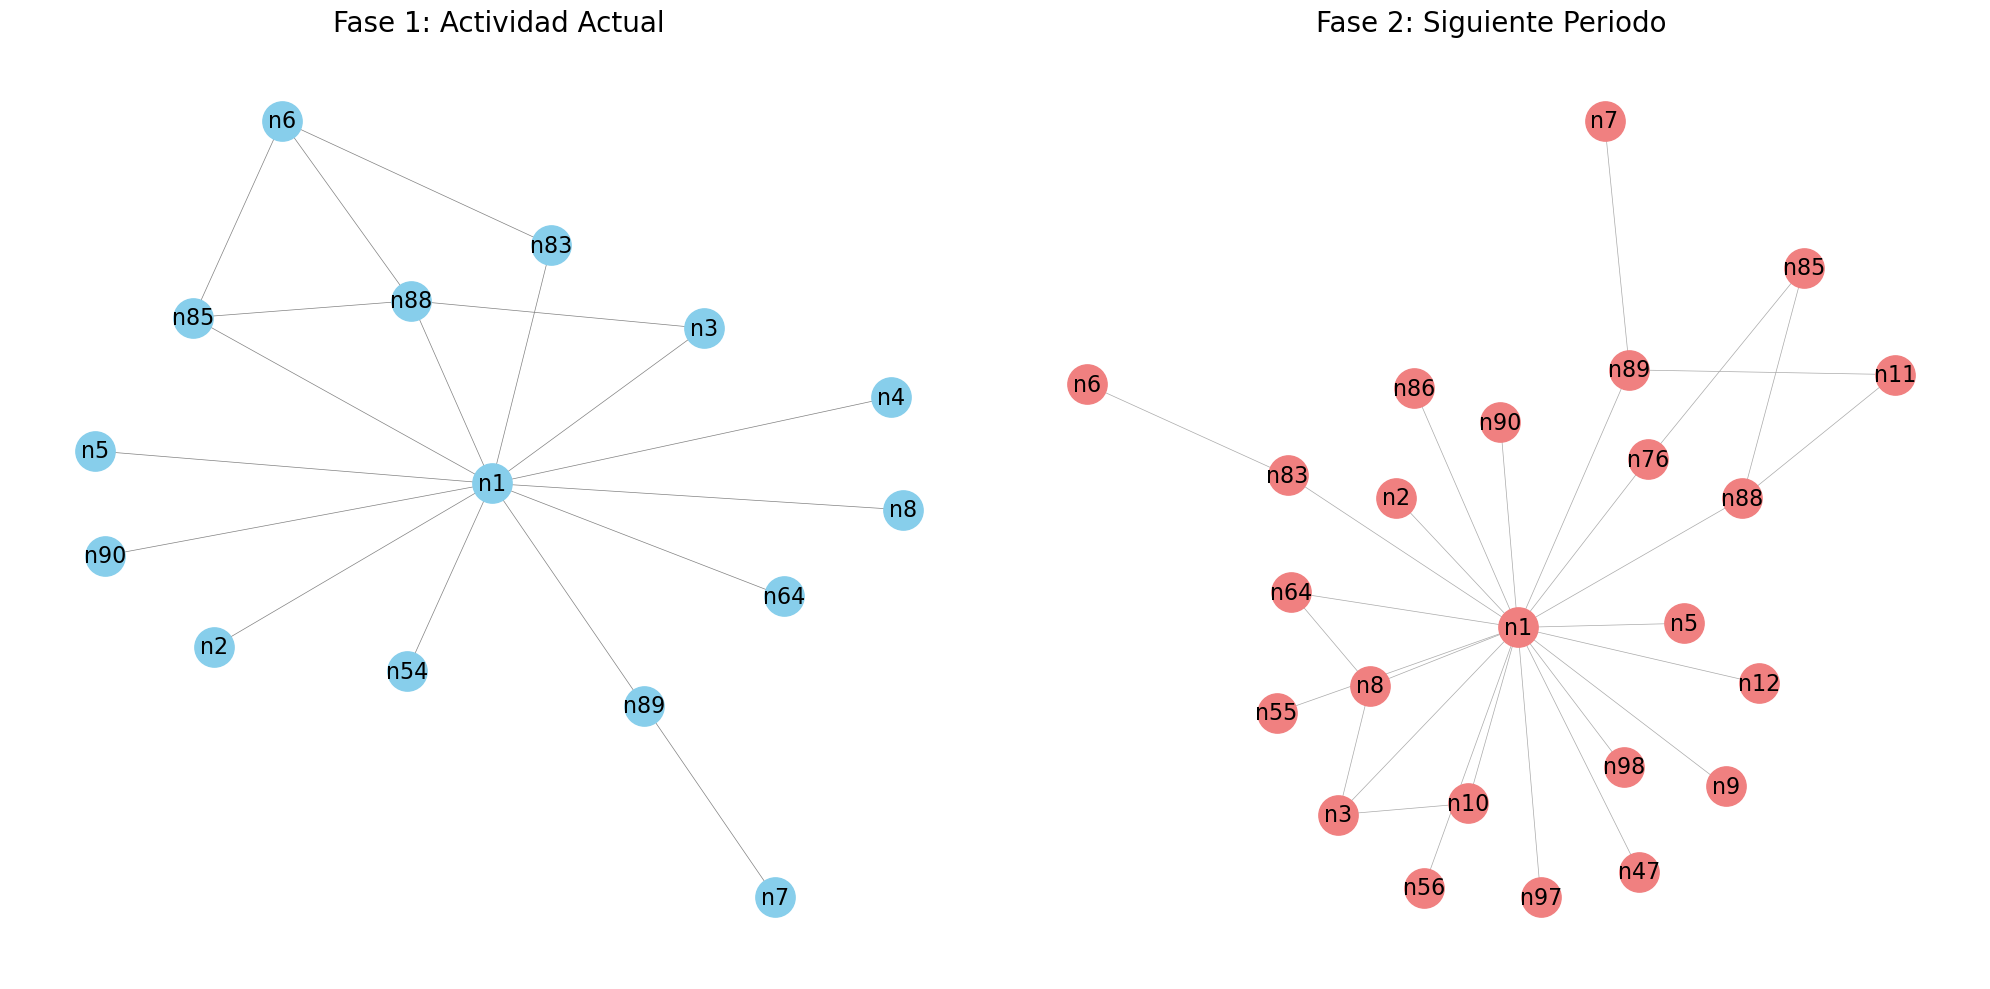

Advertencia: pygraphviz no disponible. Usando Kamada-Kawai para Fase 2 y 3.


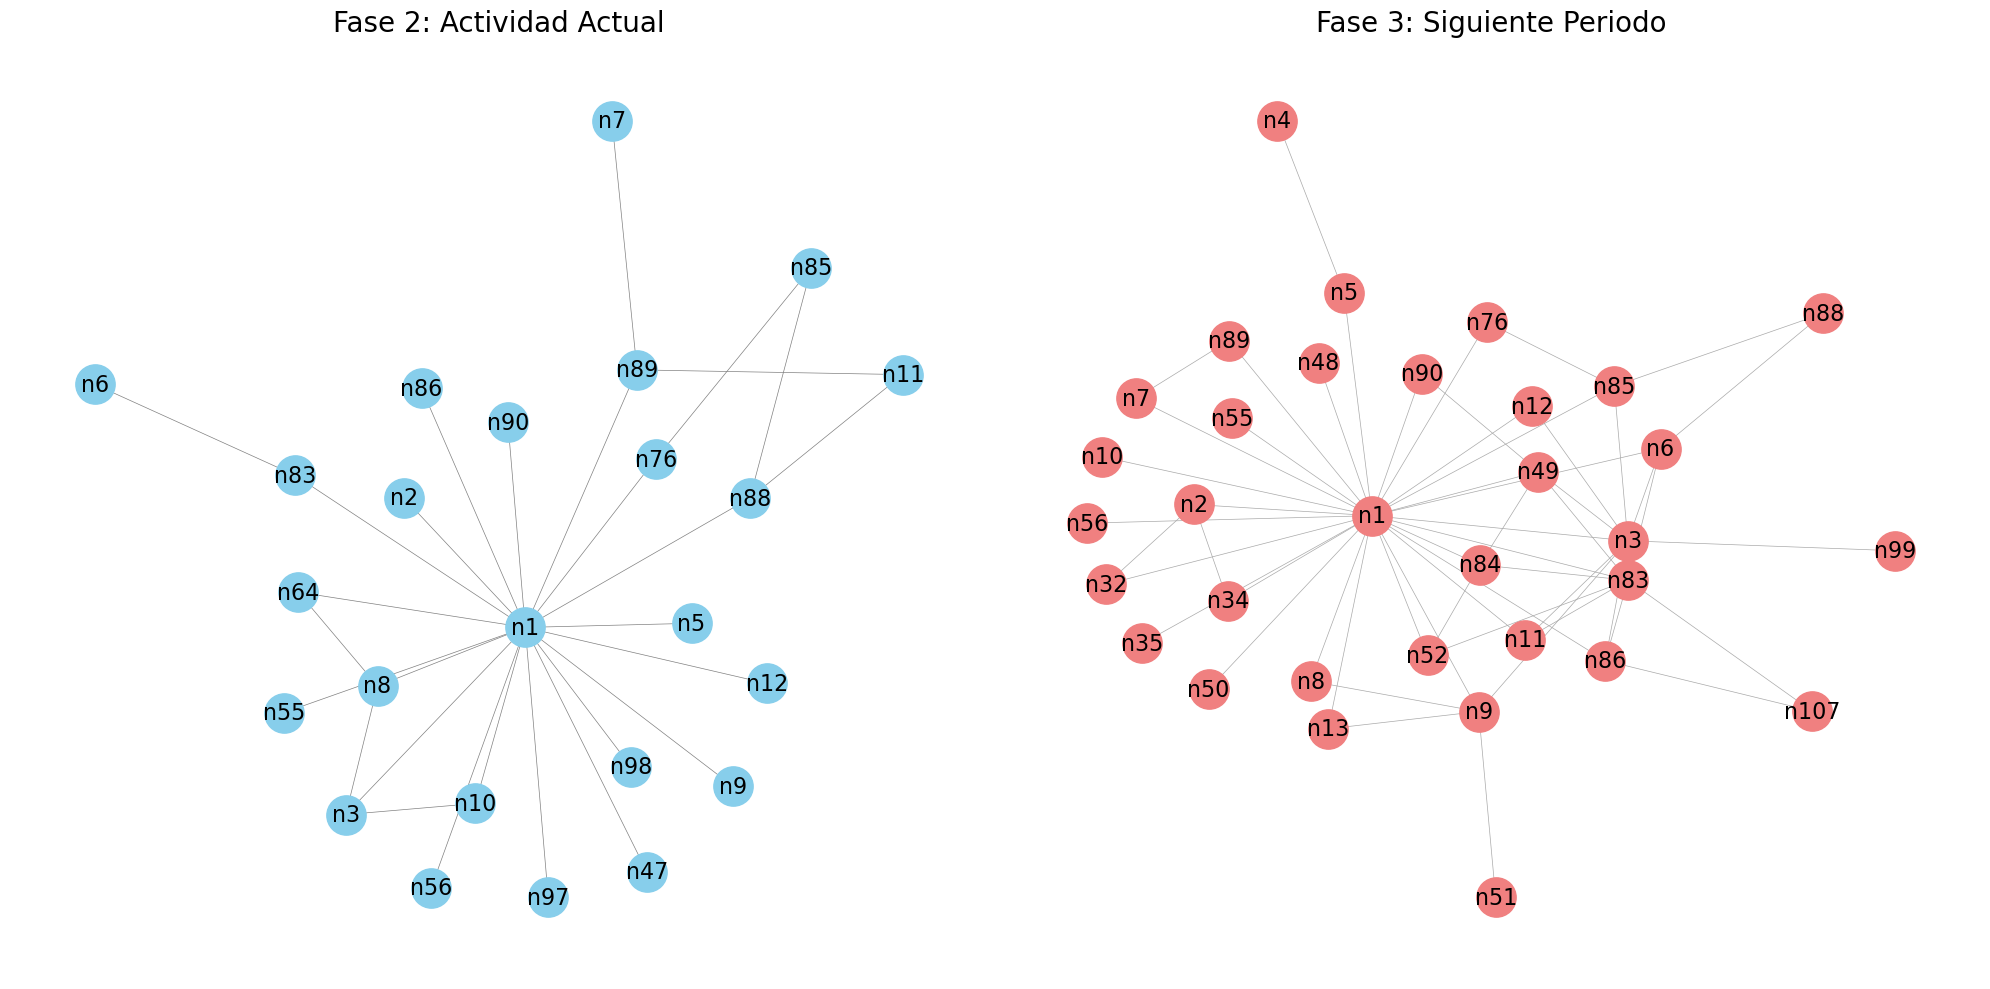

Advertencia: pygraphviz no disponible. Usando Kamada-Kawai para Fase 3 y 4.


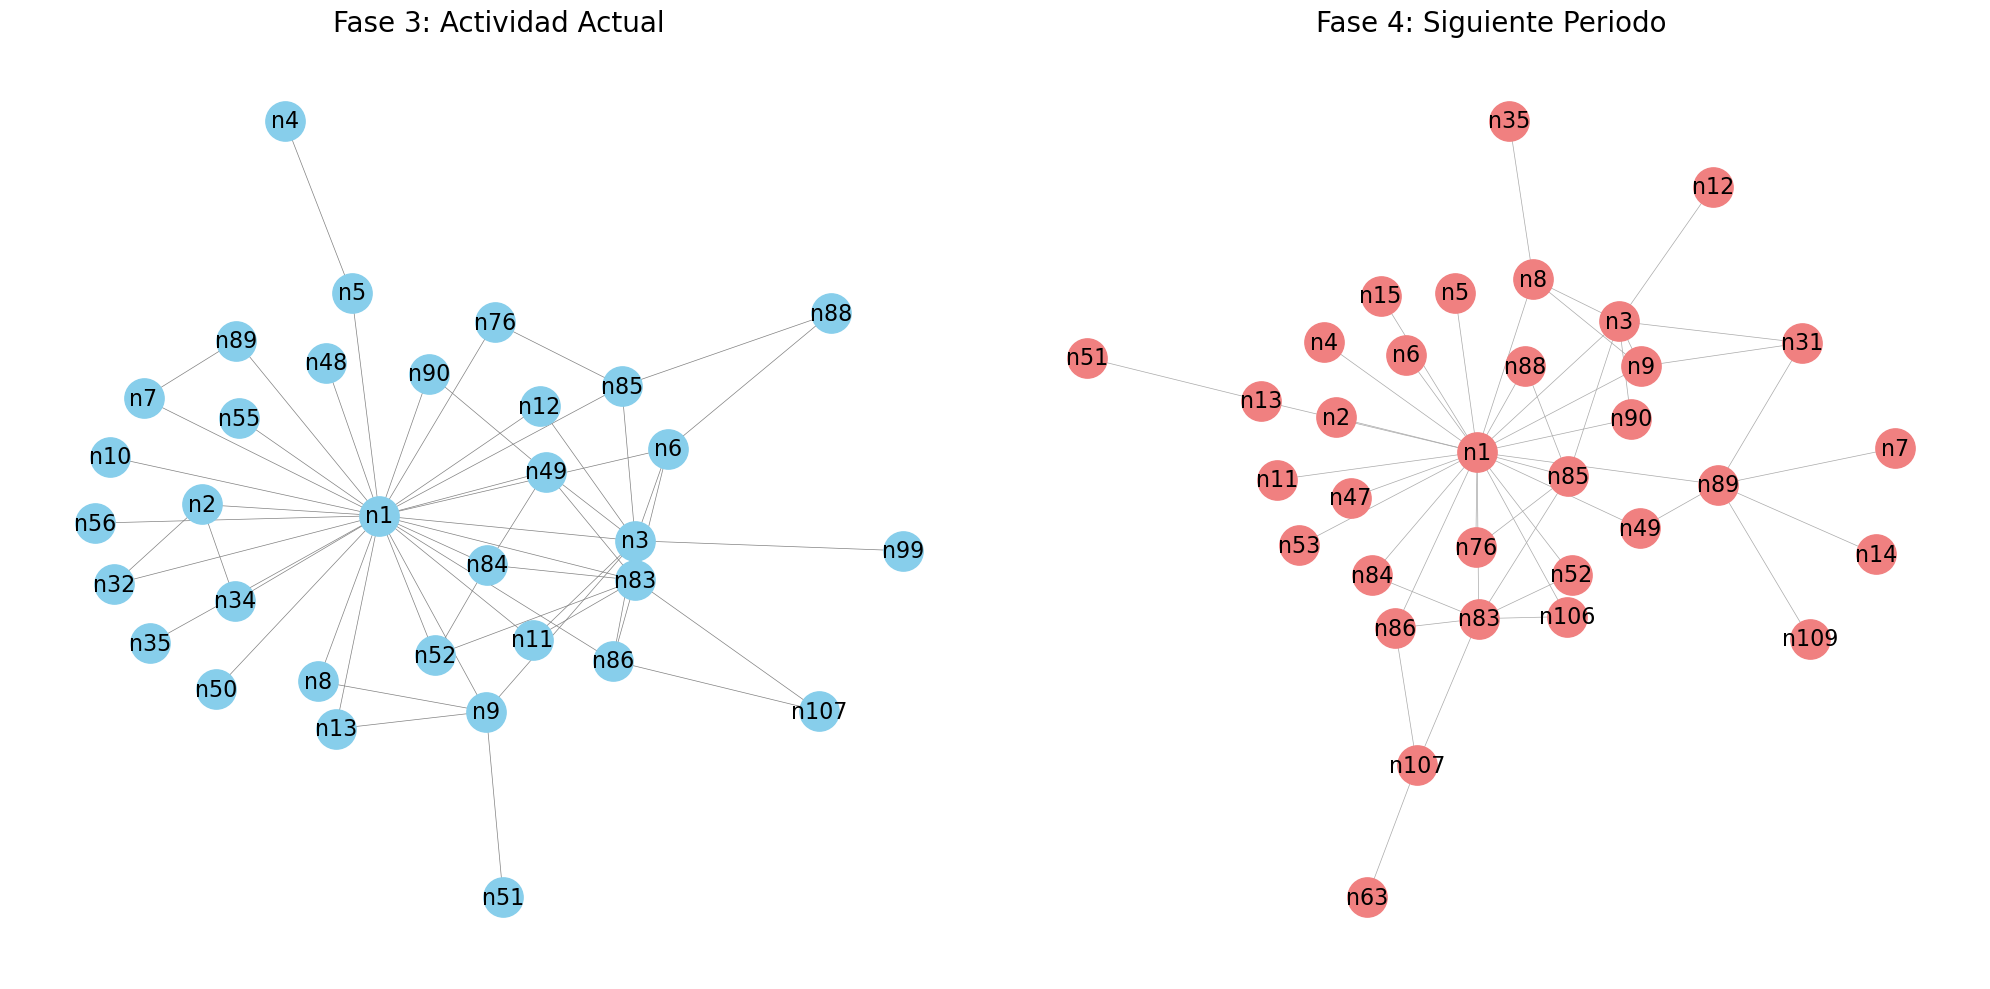

Advertencia: pygraphviz no disponible. Usando Kamada-Kawai para Fase 4 y 5.


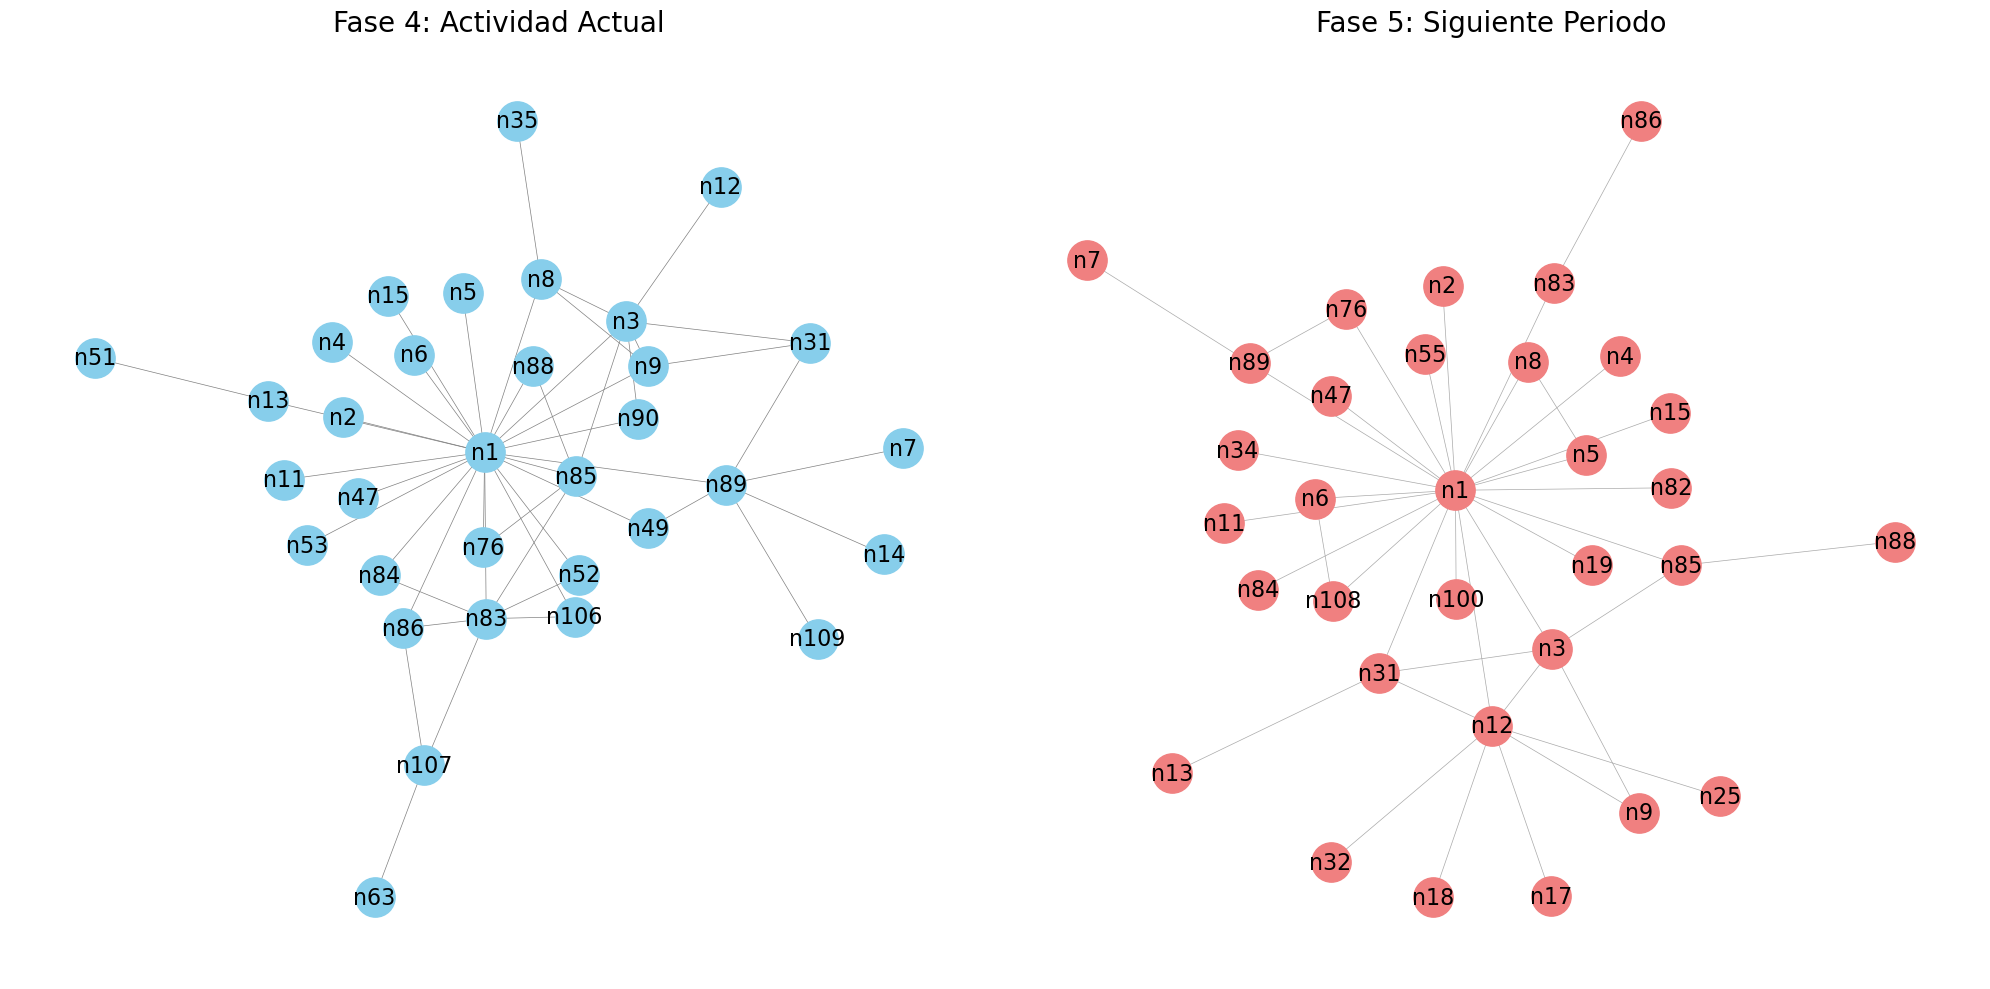

Advertencia: pygraphviz no disponible. Usando Kamada-Kawai para Fase 5 y 6.


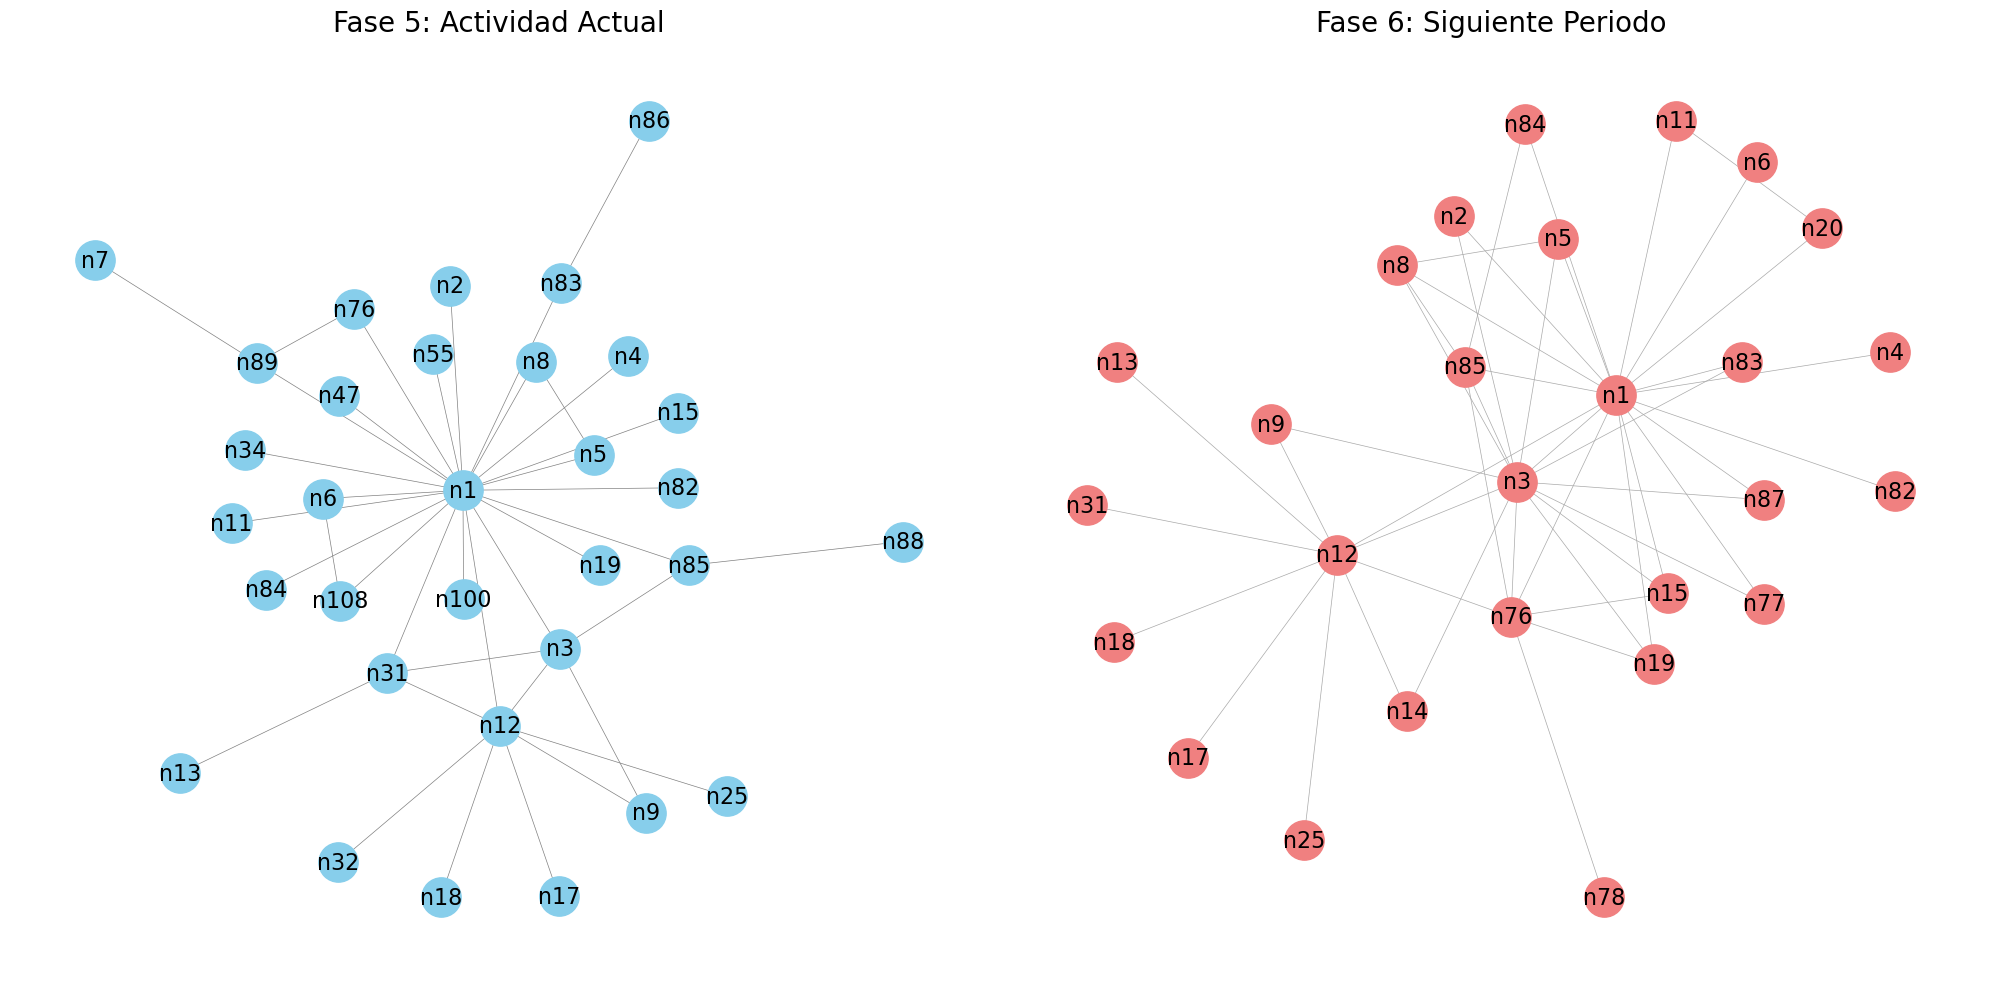

Advertencia: pygraphviz no disponible. Usando Kamada-Kawai para Fase 6 y 7.


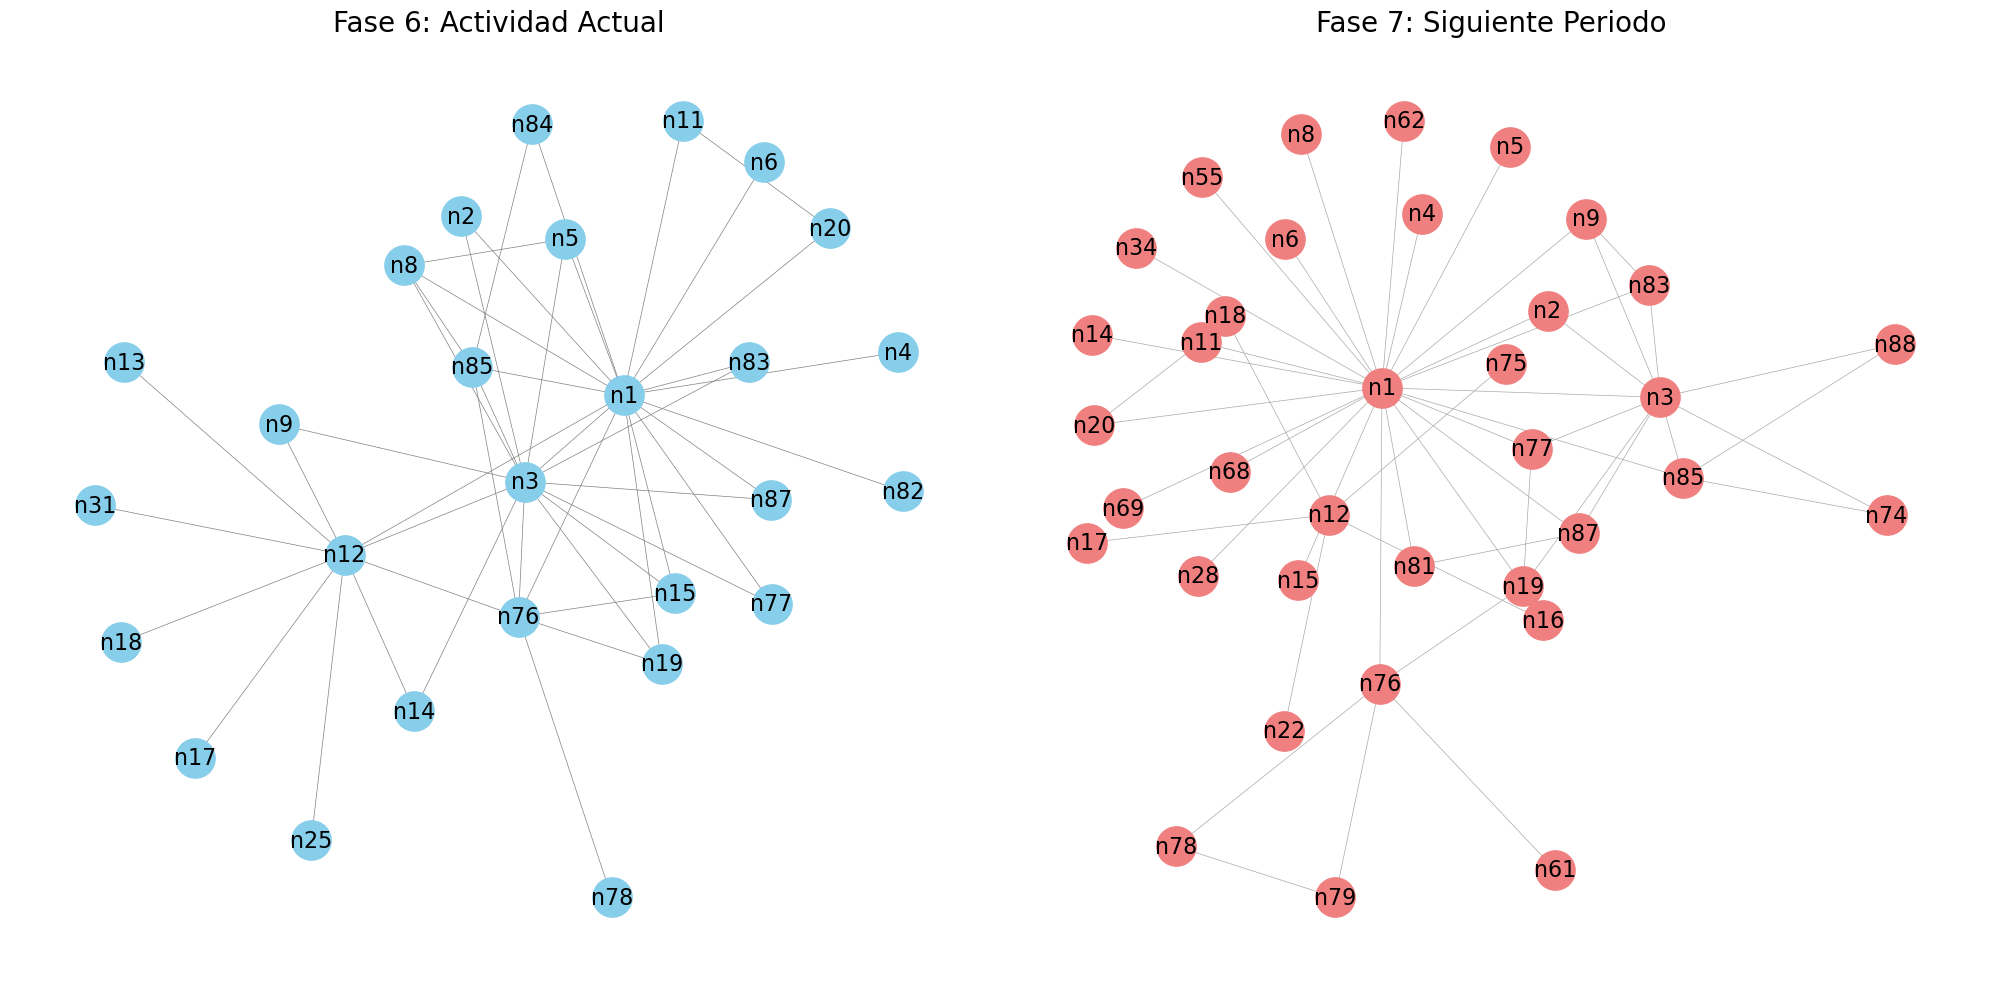

Advertencia: pygraphviz no disponible. Usando Kamada-Kawai para Fase 7 y 8.


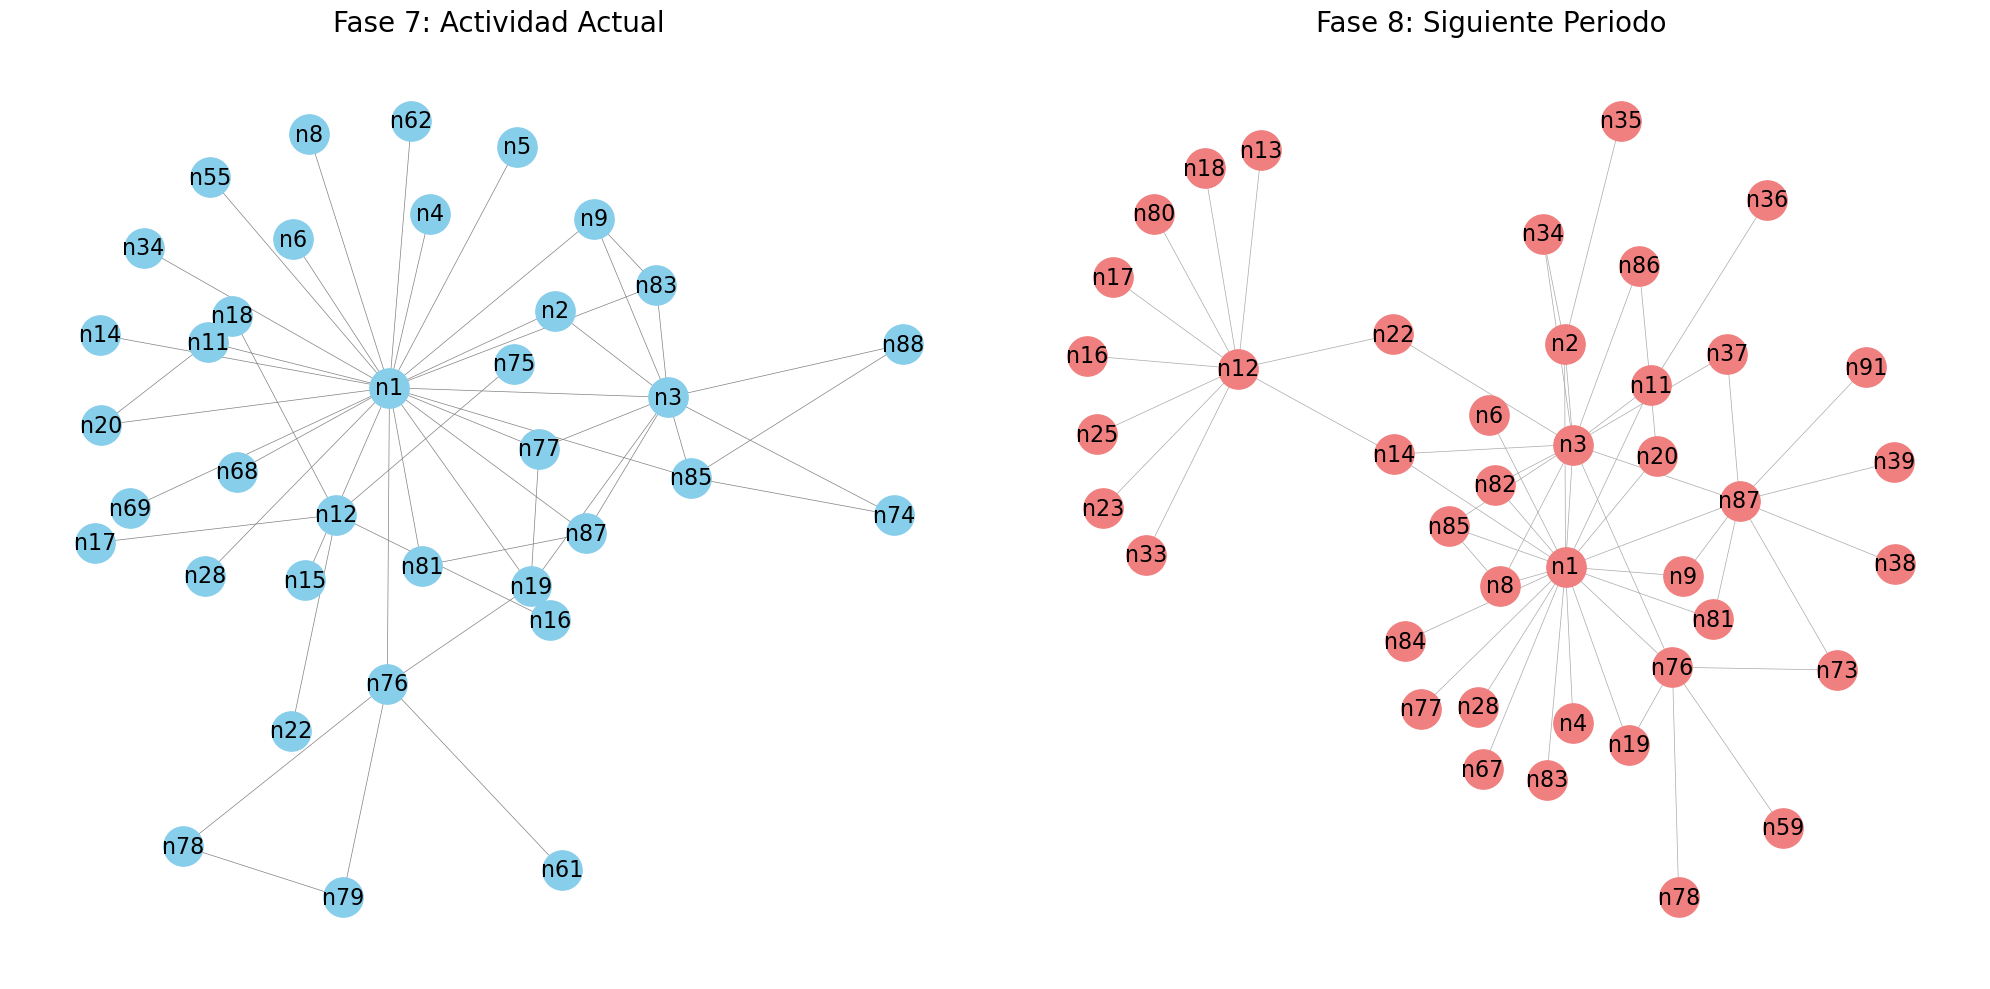

Advertencia: pygraphviz no disponible. Usando Kamada-Kawai para Fase 8 y 9.


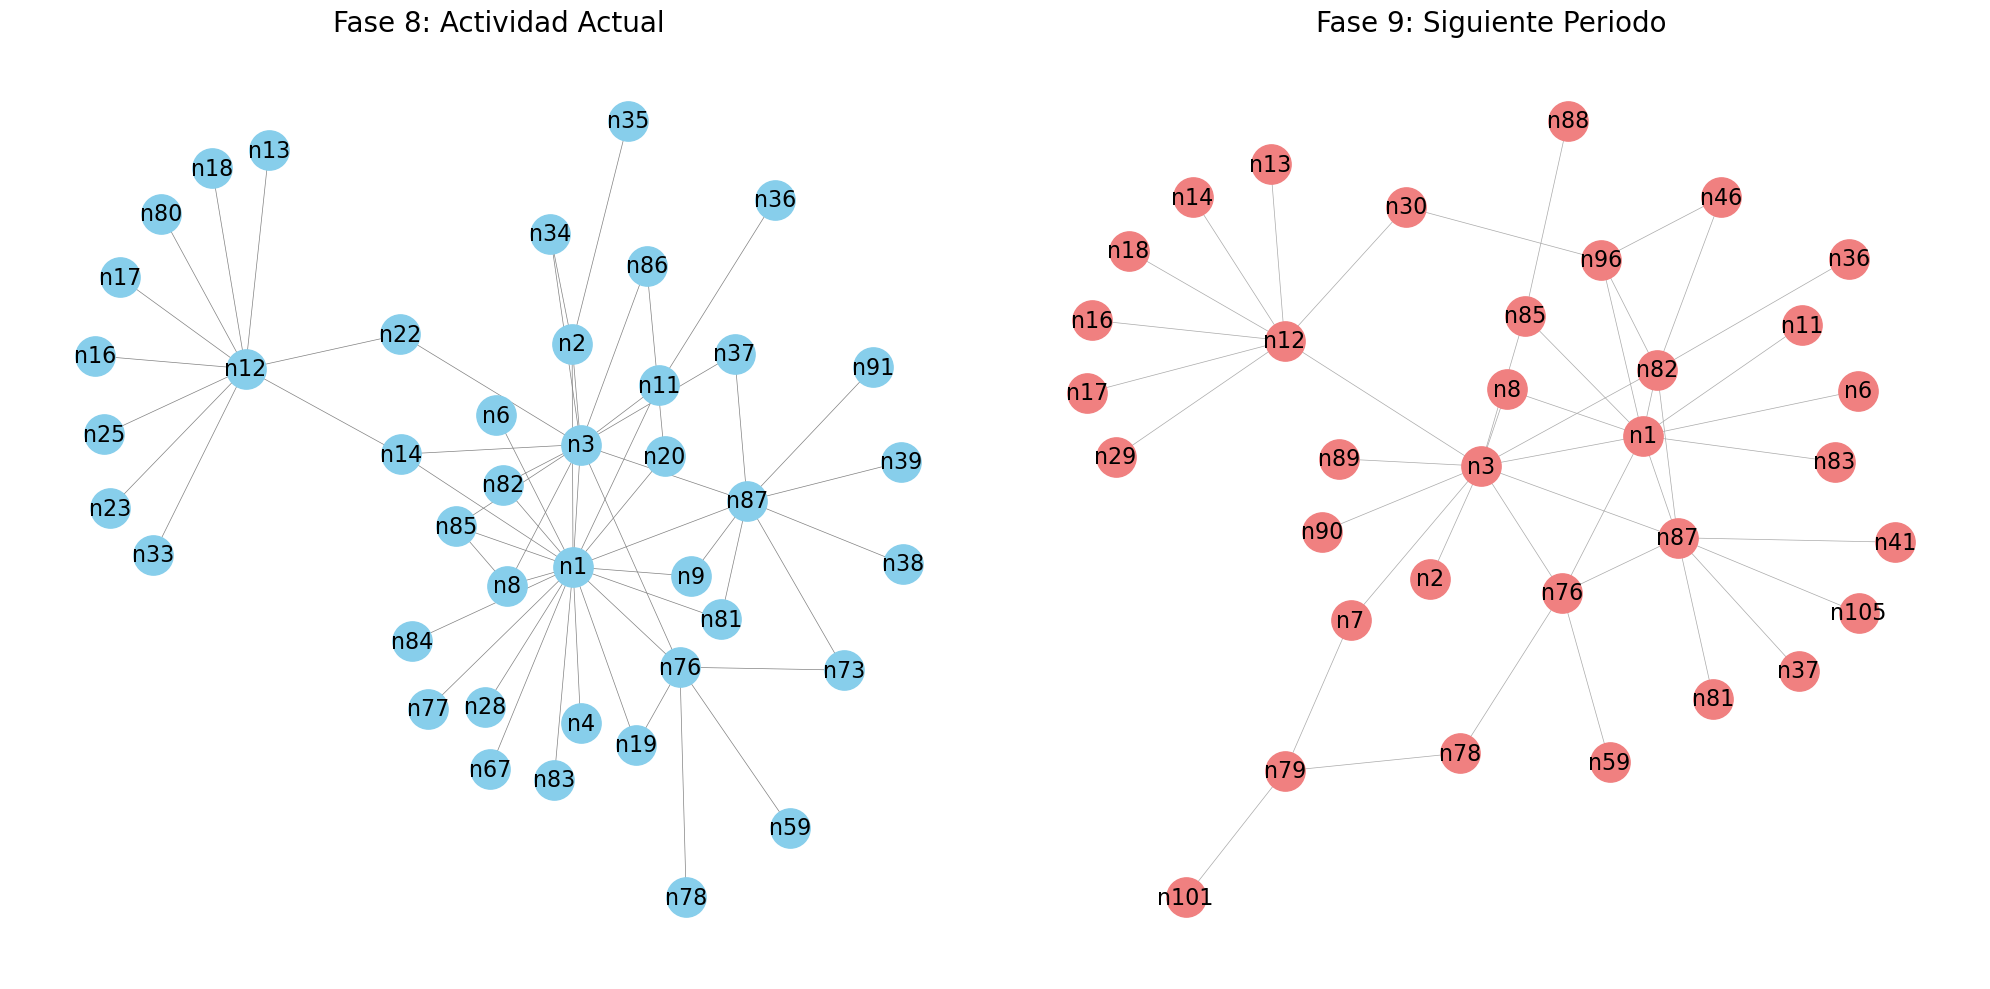

Advertencia: pygraphviz no disponible. Usando Kamada-Kawai para Fase 9 y 10.


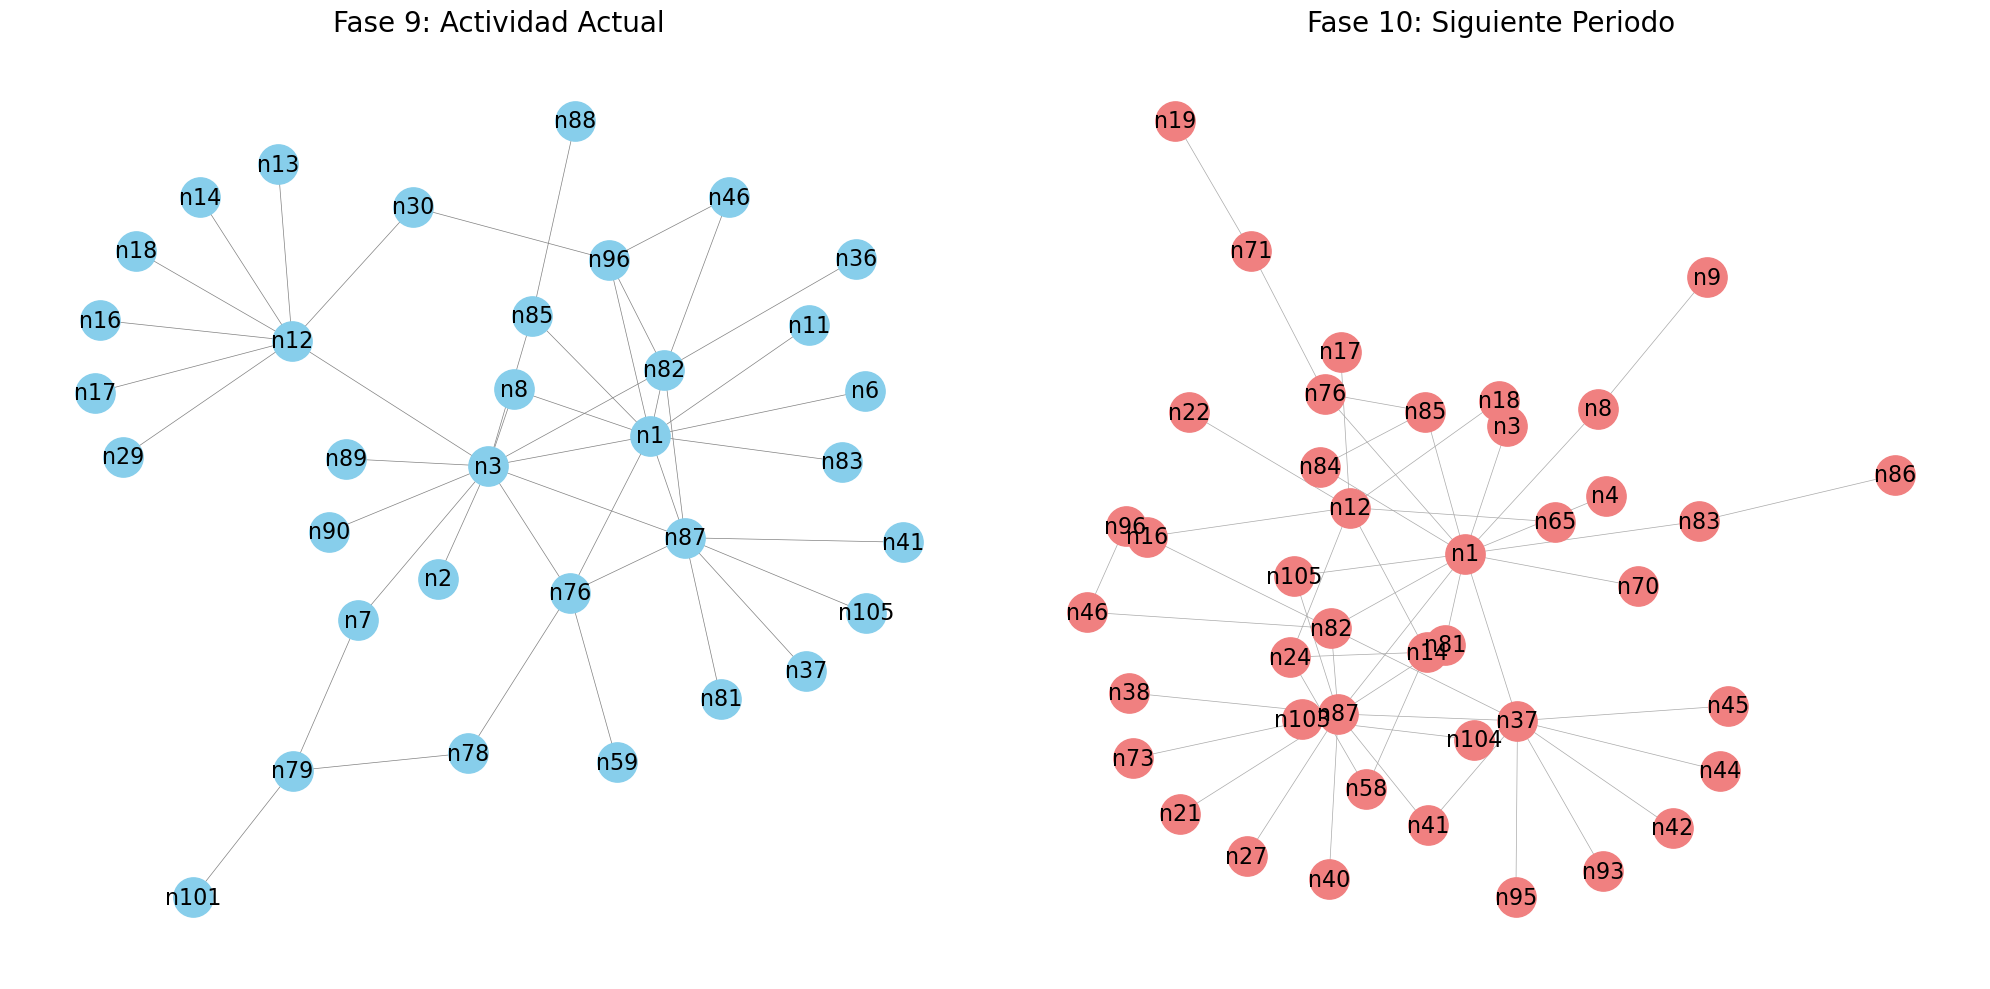

Advertencia: pygraphviz no disponible. Usando Kamada-Kawai para Fase 10 y 11.


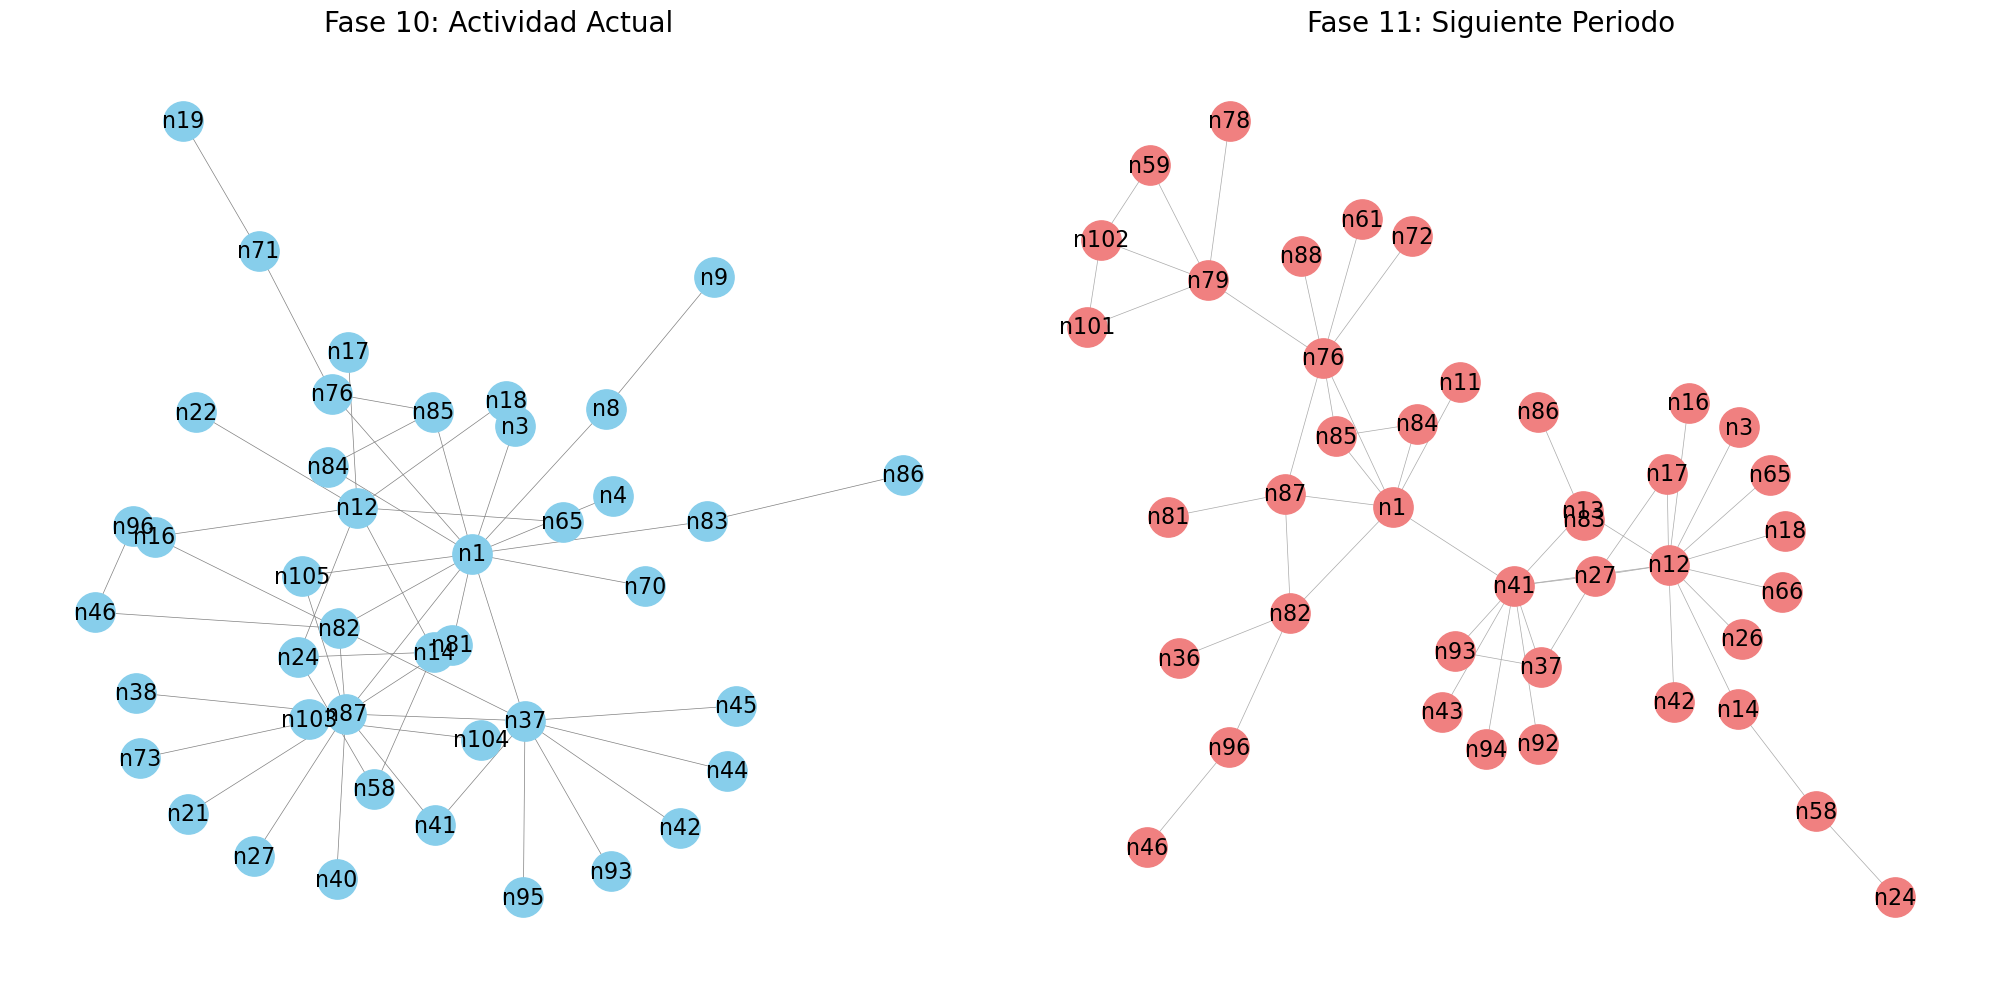

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


for i in range(1,11):
    g_current = G[i]
    g_next = G[i+1]

    try:
        # Nota: Usamos el layout 'dot' para grafos dirigidos.
        pos_current = nx.drawing.nx_agraph.graphviz_layout(g_current, prog='dot')
        pos_next = nx.drawing.nx_agraph.graphviz_layout(g_next, prog='dot')
    except ImportError:
        print(f"Advertencia: pygraphviz no disponible. Usando Kamada-Kawai para Fase {i} y {i+1}.")
        pos_current = nx.kamada_kawai_layout(g_current)
        pos_next = nx.kamada_kawai_layout(g_next)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # --- Subplot 1: Fase Actual (i) ---
    plt.sca(axes[0]) # Seleccionar el primer eje (a la izquierda)
    axes[0].set_title(f"Fase {i}: Actividad Actual", fontsize=20)

    nx.draw(
        g_current,
        pos_current,
        ax=axes[0],          # Especificar el eje de Matplotlib
        with_labels=True,
        node_size=1200,       # Reducir tamaño de nodo para mejor visualización
        node_color='skyblue',
        edge_color='gray',
        font_size=16,
        arrowsize=8,
        width=0.5
    )


    # --- Subplot 2: Fase Siguiente (i+1) ---
    plt.sca(axes[1]) # Seleccionar el segundo eje (a la derecha)
    axes[1].set_title(f"Fase {i+1}: Siguiente Periodo", fontsize=20)

    nx.draw(
        g_next,
        pos_next,
        ax=axes[1],          # Especificar el eje de Matplotlib
        with_labels=True,
        node_size=1200,
        node_color='lightcoral', # Usar un color diferente para distinguirlo
        edge_color='darkgray',
        font_size=16,
        arrowsize=8,
        width=0.5
    )

    plt.tight_layout() # Ajusta automáticamente el espacio entre su<bplots
    plt.show()

In [1]:
import pandas as pd
import networkx as nx

phases = {}
G_directed = {} # MODIFICACIÓN 1: Cambiar el nombre del diccionario a G_directed
for i in range(1,12): 
  print(f'Phase {i}')
  var_name = "phase" + str(i)
  file_name = var_name + ".csv"
  #phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i] = pd.read_csv(file_name, index_col = 0)
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  # MODIFICACIÓN 2: Usar 'create_using=nx.DiGraph()'
  G_directed[i] = nx.from_pandas_adjacency(phases[i], create_using=nx.DiGraph())
  G_directed[i].name = var_name

Phase 1
Phase 2
Phase 3
Phase 4
Phase 5
Phase 6
Phase 7
Phase 8
Phase 9
Phase 10
Phase 11


In [7]:
# Diccionario para almacenar los resultados HITS
hits_results = {}

print("Calculando puntajes HITS (Hubs y Authorities) para cada fase...")

# Itera sobre cada gráfico dirigido (fase)
for i, G in G_directed.items():
    
    # La función nx.hits devuelve dos diccionarios: authorities y hubs
    # Usamos max_iter=1000000 como se solicitó para asegurar la convergencia
    authorities, hubs = nx.hits(G, max_iter=1000000)
    
    # Almacena los resultados en el diccionario para su posterior análisis
    hits_results[i] = {
        'authorities': pd.Series(authorities).sort_values(ascending=False),
        'hubs': pd.Series(hubs).sort_values(ascending=False)
    }
    
    # Imprime los 5 mejores para cada fase para una rápida verificación
    print(f'\n--- Resultados de la Fase {i} ({G.name}) ---')
    print('Top 5 Authorities (Autoridades):')
    print(hits_results[i]['authorities'].head(5))
    print('\nTop 5 Hubs (Concentradores):')
    print(hits_results[i]['hubs'].head(5))

print("-" * 40)
print("Cálculos HITS completados. Los resultados están almacenados en el diccionario 'hits_results'.")

Calculando puntajes HITS (Hubs y Authorities) para cada fase...

--- Resultados de la Fase 1 (phase1) ---
Top 5 Authorities (Autoridades):
n1     0.421657
n88    0.159997
n85    0.122440
n3     0.094478
n83    0.066874
dtype: float64

Top 5 Hubs (Concentradores):
n88    0.112959
n3     0.094653
n85    0.094653
n1     0.079101
n89    0.074588
dtype: float64

--- Resultados de la Fase 2 (phase2) ---
Top 5 Authorities (Autoridades):
n1     0.673046
n3     0.085760
n85    0.085760
n8     0.044775
n7     0.040312
dtype: float64

Top 5 Hubs (Concentradores):
n8     0.063288
n10    0.063288
n88    0.063288
n76    0.063288
n64    0.059869
dtype: float64

--- Resultados de la Fase 3 (phase3) ---
Top 5 Authorities (Autoridades):
n1     0.359712
n83    0.092338
n49    0.085573
n3     0.084580
n86    0.058049
dtype: float64

Top 5 Hubs (Concentradores):
n3     0.050874
n84    0.045898
n86    0.045813
n85    0.043611
n1     0.043210
dtype: float64

--- Resultados de la Fase 4 (phase4) ---
Top 5 Aut

In [4]:
import pandas as pd
import networkx as nx

# --- PARTE 1: Cálculo de HITS a partir de los gráficos dirigidos ---
# Asume que G_directed está poblado con los 11 gráficos dirigidos (DiGraph)
# y que el resto del ambiente (pd, nx) está cargado.
hits_results = {}

print("Calculando puntajes HITS (Hubs y Authorities) para cada fase...")

# Iterar sobre cada fase para calcular HITS
# Usamos el rango de 1 a 11, asumiendo que las claves de G_directed son 1 a 11.
for i in range(1, 12):
    G = G_directed[i]
    
    # Calcular HITS con el máximo de iteraciones solicitado
    authorities, hubs = nx.hits(G, max_iter=1000000)
    
    # Almacenar los resultados como Series de Pandas
    hits_results[i] = {
        'authorities': pd.Series(authorities),
        'hubs': pd.Series(hubs)
    }
    print(f'Cálculo HITS completado para la Fase {i}.')

print("-" * 50)


# --- PARTE 2: Extracción y Generación de Tablas para n1 y n3 ---

data_n1 = []
data_n3 = []
column_names = ["Fase", "Authority Score", "Hub Score"]

for i in range(1, 12):
    fase_nombre = f'Phase {i}'
    
    # Extraer valores para el nodo n1. Usamos .get() con 0.0 en caso de que el nodo no exista.
    auth_n1 = hits_results[i]['authorities'].get('n1', 0.0)
    hub_n1 = hits_results[i]['hubs'].get('n1', 0.0)
    data_n1.append([fase_nombre, auth_n1, hub_n1])

    # Extraer valores para el nodo n3
    auth_n3 = hits_results[i]['authorities'].get('n3', 0.0)
    hub_n3 = hits_results[i]['hubs'].get('n3', 0.0)
    data_n3.append([fase_nombre, auth_n3, hub_n3])

# Generar e imprimir la Tabla para el Nodo n1
df_n1 = pd.DataFrame(data_n1, columns=column_names)
print("Tabla de Centralidad HITS para el Actor n1")
print("-" * 40)
# Usamos to_markdown para el formato de tabla solicitado (con 8 decimales)
print(df_n1.to_markdown(index=False, floatfmt=".3f")) 

# Generar e imprimir la Tabla para el Nodo n3
df_n3 = pd.DataFrame(data_n3, columns=column_names)
print("\nTabla de Centralidad HITS para el Actor n3")
print("-" * 40)
print(df_n3.to_markdown(index=False, floatfmt=".3f"))

Calculando puntajes HITS (Hubs y Authorities) para cada fase...
Cálculo HITS completado para la Fase 1.
Cálculo HITS completado para la Fase 2.
Cálculo HITS completado para la Fase 3.
Cálculo HITS completado para la Fase 4.
Cálculo HITS completado para la Fase 5.
Cálculo HITS completado para la Fase 6.
Cálculo HITS completado para la Fase 7.
Cálculo HITS completado para la Fase 8.
Cálculo HITS completado para la Fase 9.
Cálculo HITS completado para la Fase 10.
Cálculo HITS completado para la Fase 11.
--------------------------------------------------
Tabla de Centralidad HITS para el Actor n1
----------------------------------------
| Fase     |   Authority Score |   Hub Score |
|:---------|------------------:|------------:|
| Phase 1  |             0.422 |       0.079 |
| Phase 2  |             0.673 |       0.006 |
| Phase 3  |             0.360 |       0.043 |
| Phase 4  |             0.361 |       0.041 |
| Phase 5  |             0.431 |       0.031 |
| Phase 6  |             0.099

In [6]:
import pandas as pd

# --- Preparación de los datos ---
# Asume que el diccionario 'hits_results' está poblado y tiene esta estructura:
# hits_results[i]['authorities'] y hits_results[i]['hubs'] son pd.Series

leader_evolution_data = []
column_names = ["Phase", "Node with Highest Authority Score", "Node with Highest Hub Score"]

print("Identificando al líder (Authority) y al coordinador (Hub) por fase...")

for i in range(1, 12):
    fase_nombre = f'Phase {i}'
    
    # 1. Identificar el nodo con el mayor Authority Score (Líder/Fuente de valor)
    # .idxmax() devuelve el índice (nombre del nodo, ej., 'n1') con el valor máximo
    highest_authority_node = hits_results[i]['authorities'].idxmax()
    
    # 2. Identificar el nodo con el mayor Hub Score (Coordinador/Distribuidor de enlaces)
    highest_hub_node = hits_results[i]['hubs'].idxmax()
    
    # Agregar los resultados a la lista de datos
    leader_evolution_data.append([fase_nombre, highest_authority_node, highest_hub_node])

# --- Generación e Impresión de la Tabla ---

df_evolution = pd.DataFrame(leader_evolution_data, columns=column_names)

print("-" * 75)
print("Tabla de Evolución de Roles Centrales (Líderes y Coordinadores) por Fase")
print("-" * 75)
# Usamos to_markdown para un formato de tabla limpio
print(df_evolution.to_markdown(index=False))

Identificando al líder (Authority) y al coordinador (Hub) por fase...
---------------------------------------------------------------------------
Tabla de Evolución de Roles Centrales (Líderes y Coordinadores) por Fase
---------------------------------------------------------------------------
| Phase    | Node with Highest Authority Score   | Node with Highest Hub Score   |
|:---------|:------------------------------------|:------------------------------|
| Phase 1  | n1                                  | n88                           |
| Phase 2  | n1                                  | n88                           |
| Phase 3  | n1                                  | n3                            |
| Phase 4  | n1                                  | n85                           |
| Phase 5  | n1                                  | n12                           |
| Phase 6  | n3                                  | n1                            |
| Phase 7  | n1                          

# Project 

## Carga Datos

In [8]:
import pandas as pd
import networkx as nx
phases = {}
G = {}
for i in range(1,12): 
  print(f'Phase {i}')
  var_name = "phase" + str(i)
  file_name = var_name + ".csv"
  #phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i] = pd.read_csv(file_name, index_col = 0)
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

Phase 1
Phase 2
Phase 3
Phase 4
Phase 5
Phase 6
Phase 7
Phase 8
Phase 9
Phase 10
Phase 11


## Dinero por fase

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Datos de incautaciones proporcionados:
# Nota: La primera incautación fue en la Fase 4, por lo que asumimos 0 para Fases 1, 2, 3 y 5.
data_incautaciones = {
    'Fase': list(range(1, 12)),
    'Incautaciones': [0, 0, 0, 1, 0, 3, 1, 1, 2, 1, 2], # Basado en la nota.
    'Dinero Perdido ($)': [
        0, 0, 0, 2_500_000, 0, 1_300_000, 3_500_000, 360_000, 4_300_000, 18_700_000, 1_300_000
    ]
}

# Crear el DataFrame (Punto 1, 2 y 3)
df_policia = pd.DataFrame(data_incautaciones)
df_policia['Fase'] = 'Phase ' + df_policia['Fase'].astype(str) # Formato 'Phase X'

# 4. Calcular el Dinero Promedio Rescatado por Incautación
def calcular_promedio(row):
    if row['Incautaciones'] == 0:
        return 0.0
    else:
        return row['Dinero Perdido ($)'] / row['Incautaciones']

df_policia['Dinero Promedio por Incautación ($)'] = df_policia.apply(calcular_promedio, axis=1)

print("Tabla de Análisis de la Presión Policial:")
print(df_policia.to_markdown(index=False, floatfmt=(None, None, None, ",.0f", ",.2f")))
print("-" * 70)

Tabla de Análisis de la Presión Policial:
| Fase     |   Incautaciones |   Dinero Perdido ($) |   Dinero Promedio por Incautación ($) |
|:---------|----------------:|---------------------:|--------------------------------------:|
| Phase 1  |               0 |                    0 |                                     0 |
| Phase 2  |               0 |                    0 |                                     0 |
| Phase 3  |               0 |                    0 |                                     0 |
| Phase 4  |               1 |              2500000 |                             2,500,000 |
| Phase 5  |               0 |                    0 |                                     0 |
| Phase 6  |               3 |              1300000 |                               433,333 |
| Phase 7  |               1 |              3500000 |                             3,500,000 |
| Phase 8  |               1 |               360000 |                               360,000 |
| Phase 9  |      

In [20]:
df_policia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Fase                                 11 non-null     object 
 1   Incautaciones                        11 non-null     int64  
 2   Dinero Perdido ($)                   11 non-null     int64  
 3   Dinero Promedio por Incautación ($)  11 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 484.0+ bytes


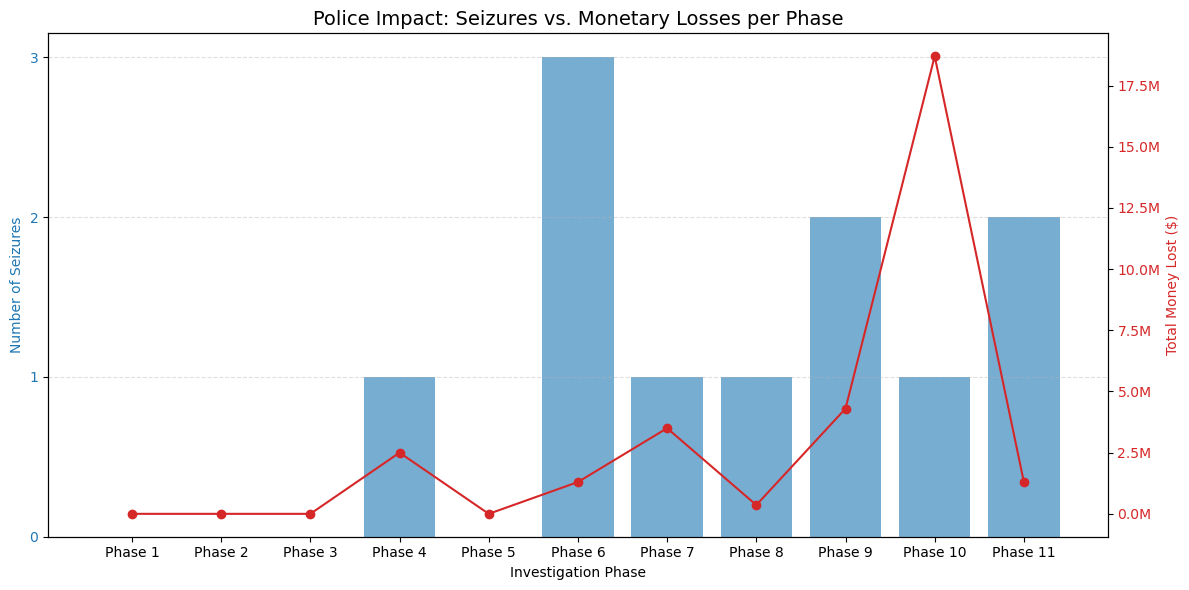

In [21]:
import matplotlib.ticker as ticker

# 5. Dual-Axis Chart (Bars for Seizures, Line for Money Lost)
fig, ax1 = plt.subplots(figsize=(12, 6))

# First Y-Axis: Number of Seizures (Bars)
color_bar = 'tab:blue'
ax1.set_xlabel('Investigation Phase')
ax1.set_ylabel('Number of Seizures', color=color_bar)
ax1.bar(df_policia['Fase'], df_policia['Incautaciones'], color=color_bar, alpha=0.6, label='Seizures')
ax1.tick_params(axis='y', labelcolor=color_bar)
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# Force Y-axis ticks to be integers
ax1.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Second Y-Axis: Money Lost (Line)
ax2 = ax1.twinx()
color_line = 'tab:red'
ax2.set_ylabel('Total Money Lost ($)', color=color_line)
ax2.plot(df_policia['Fase'], df_policia['Dinero Perdido ($)'], color=color_line, marker='o', label='Total Money Lost')
ax2.tick_params(axis='y', labelcolor=color_line)

# Format Y-axis for money in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x/1e6:,.1f}M')
ax2.yaxis.set_major_formatter(formatter)

plt.title('Police Impact: Seizures vs. Monetary Losses per Phase', fontsize=14)
fig.tight_layout()
plt.show()


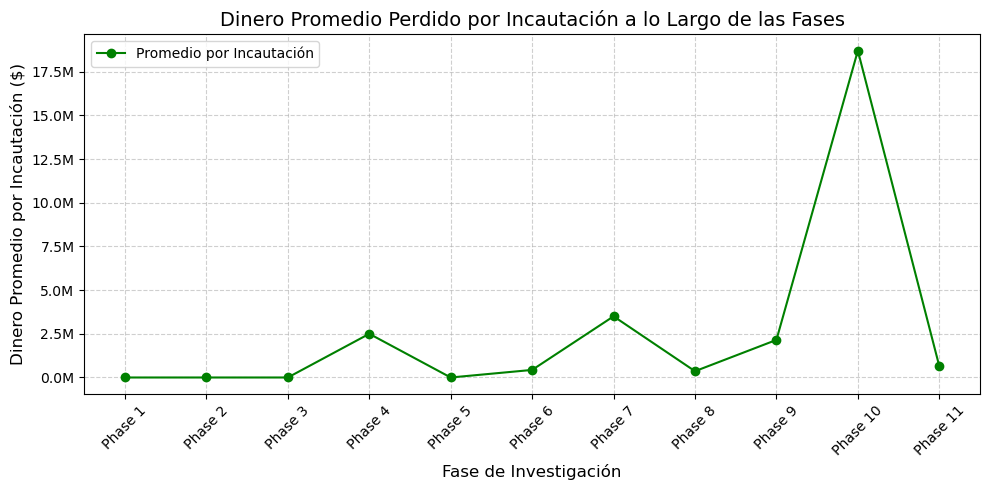

In [18]:
# 6. Gráfico de Línea del Dinero Promedio Rescatado por Incautación
plt.figure(figsize=(10, 5))

plt.plot(
    df_policia['Fase'], 
    df_policia['Dinero Promedio por Incautación ($)'], 
    marker='o', 
    linestyle='-', 
    color='green', 
    label='Promedio por Incautación'
)

# Formatear el eje Y para mejor lectura (millones)
formatter = plt.FuncFormatter(lambda x, pos: f'{x/1e6:,.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Dinero Promedio Perdido por Incautación a lo Largo de las Fases', fontsize=14)
plt.xlabel('Fase de Investigación', fontsize=12)
plt.ylabel('Dinero Promedio por Incautación ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## Centralidades

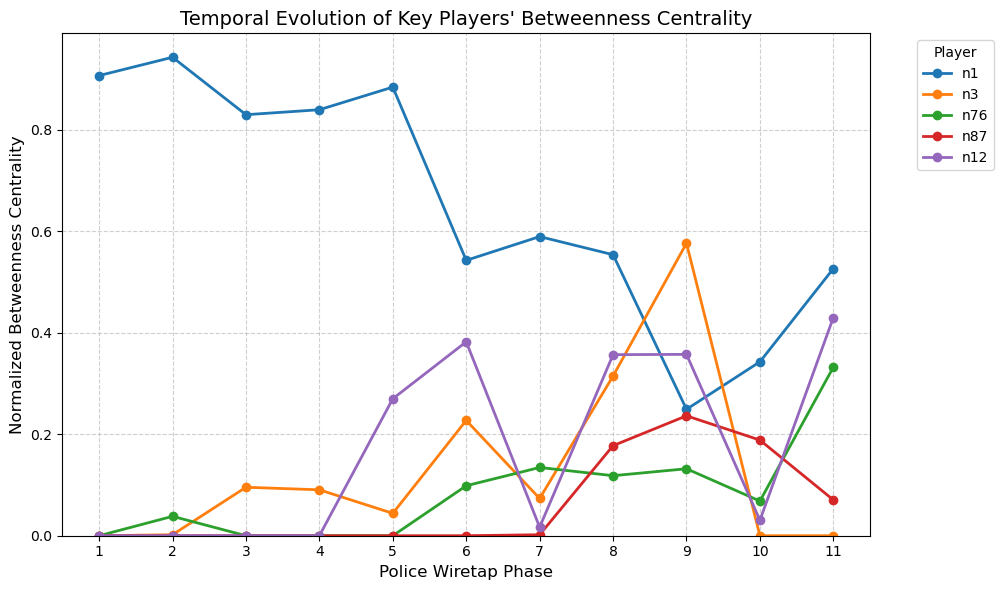

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Nodes and Phases to analyze
nodes_to_plot = ['n1', 'n3', 'n76', 'n87', 'n12']
phases = list(range(1, 12)) # Phases 1 to 11

# DataFrame to store Betweenness Centrality results
# Rows will be phases and columns will be the nodes
centrality_df = pd.DataFrame(index=phases, columns=nodes_to_plot, data=0.0)

# ----------------------------------------------------------------------
# 1. Calculate Betweenness Centrality for all phases
# ----------------------------------------------------------------------

# NOTE: This code assumes that the graphs in the dictionary G 
# are loaded as undirected graphs (nx.Graph) to match the user's requirement.
for i in phases:
    if i not in G:
        # Assumes 0 if the graph is not available
        continue 
    
    try:
        # Calculate the Betweenness Centrality for the current phase
        # normalized=True is essential for comparison
        betweenness = nx.betweenness_centrality(G[i], normalized=True)
    except Exception as e:
        print(f"Error calculating Betweenness in Phase {i}: {e}")
        continue

    # Store the centrality of the nodes of interest in the DataFrame
    for node in nodes_to_plot:
        # Use .get(node, 0.0) to safely retrieve the value (assigning 0.0 if node is isolated)
        centrality_df.loc[i, node] = betweenness.get(node, 0.0)

# ----------------------------------------------------------------------
# 2. Generate the Line Plot
# ----------------------------------------------------------------------

plt.figure(figsize=(12, 6))

# Use the pandas plot method (which uses matplotlib)
centrality_df.plot(ax=plt.gca(), marker='o', linewidth=2)

# Configure the X-axis (Phases)
plt.xticks(phases)
plt.xlabel("Police Wiretap Phase", fontsize=12)

# Configure the Y-axis (Centrality)
plt.ylabel("Normalized Betweenness Centrality", fontsize=12)
plt.ylim(bottom=0) # Minimum value is 0

# Title
plt.title("Temporal Evolution of Key Players' Betweenness Centrality", fontsize=14)

# Move the legend outside the plot area
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend

plt.show()

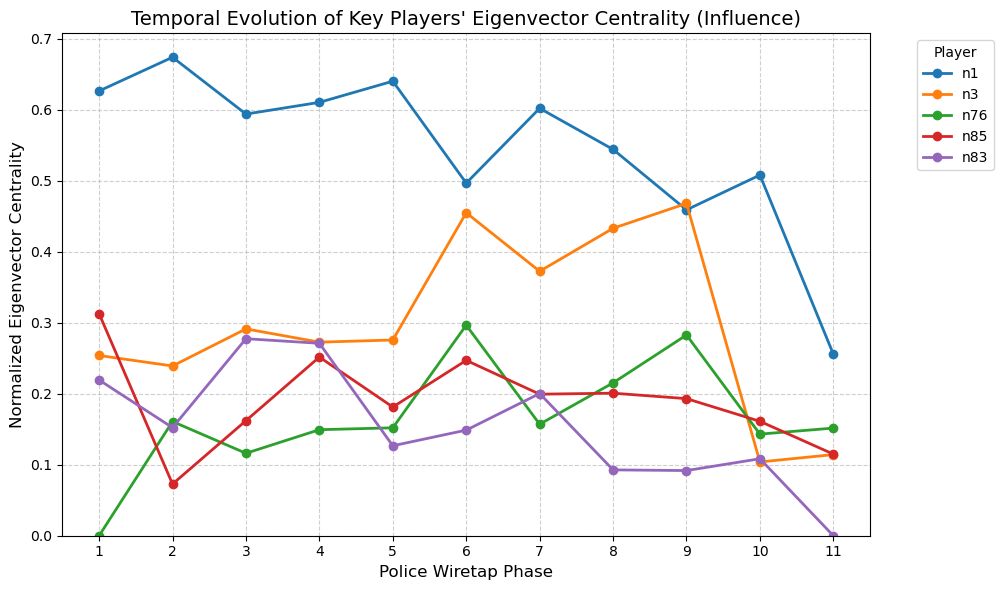

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Nodes and Phases to analyze
nodes_to_plot = ['n1', 'n3', 'n76', 'n85', 'n83']
phases = list(range(1, 12)) # Phases 1 to 11

# DataFrame to store Eigenvector Centrality results
# Rows will be phases and columns will be the nodes
centrality_df = pd.DataFrame(index=phases, columns=nodes_to_plot, data=0.0)

# ----------------------------------------------------------------------
# 1. Calculate Eigenvector Centrality for all phases
# ----------------------------------------------------------------------

# NOTE: This code assumes the graphs in G are loaded as undirected (nx.Graph) 
# or directed (nx.DiGraph), and that they contain node names 'n1', 'n3', etc.
for i in phases:
    if i not in G:
        # Assumes 0 if the graph is not available
        continue 
    
    try:
        # Calculate Eigenvector Centrality for the current phase (O(k*E) complexity)
        # It is inherently normalized (sum of squared values equals 1).
        eigenvector = nx.eigenvector_centrality(G[i], max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        print(f"Warning: Eigenvector calculation failed to converge in Phase {i}. Assuming 0.0.")
        eigenvector = {} # Use an empty dict so .get() returns 0.0

    # Store the centrality of the nodes of interest in the DataFrame
    for node in nodes_to_plot:
        # Use .get(node, 0.0) to safely retrieve the value (assigning 0.0 if node is isolated)
        centrality_df.loc[i, node] = eigenvector.get(node, 0.0)

# ----------------------------------------------------------------------
# 2. Generate the Line Plot
# ----------------------------------------------------------------------

plt.figure(figsize=(12, 6))

# Use the pandas plot method (which uses matplotlib)
centrality_df.plot(ax=plt.gca(), marker='o', linewidth=2)

# Configure the X-axis (Phases)
plt.xticks(phases)
plt.xlabel("Police Wiretap Phase", fontsize=12)

# Configure the Y-axis (Centrality)
plt.ylabel("Normalized Eigenvector Centrality", fontsize=12)
plt.ylim(bottom=0) # Minimum value is 0

# Title
plt.title("Temporal Evolution of Key Players' Eigenvector Centrality (Influence)", fontsize=14)

# Move the legend outside the plot area
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend

plt.show()

In [24]:
# Diccionarios para guardar resultados
betweenness_all = {}
eigenvector_all = {}

for i in range(1, 12):
    print(f"Calculating centralities for Phase {i}...")
    G_i = G[i]
    
    # Betweenness centrality (normalized between 0 and 1)
    bet_centrality = nx.betweenness_centrality(G_i, normalized=True)
    
    # Eigenvector centrality (using power iteration)
    try:
        eig_centrality = nx.eigenvector_centrality(G_i, max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        print(f"⚠️ Eigenvector centrality did not converge for Phase {i}")
        eig_centrality = {node: None for node in G_i.nodes()}
    
    # Guardar en los diccionarios
    betweenness_all[i] = bet_centrality
    eigenvector_all[i] = eig_centrality

print("✅ Finished calculating betweenness and eigenvector centralities.")


Calculating centralities for Phase 1...
Calculating centralities for Phase 2...
Calculating centralities for Phase 3...
Calculating centralities for Phase 4...
Calculating centralities for Phase 5...
Calculating centralities for Phase 6...
Calculating centralities for Phase 7...
Calculating centralities for Phase 8...
Calculating centralities for Phase 9...
Calculating centralities for Phase 10...
Calculating centralities for Phase 11...
✅ Finished calculating betweenness and eigenvector centralities.


In [ ]:
# Convertir betweenness a DataFrame
df_bet = pd.DataFrame(betweenness_all).fillna(0)
df_bet.index.name = "Node"
df_bet.columns = [f"Phase {i}" for i in range(1, 12)]

# Convertir eigenvector a DataFrame
df_eig = pd.DataFrame(eigenvector_all).fillna(0)
df_eig.index.name = "Node"
df_eig.columns = [f"Phase {i}" for i in range(1, 12)]


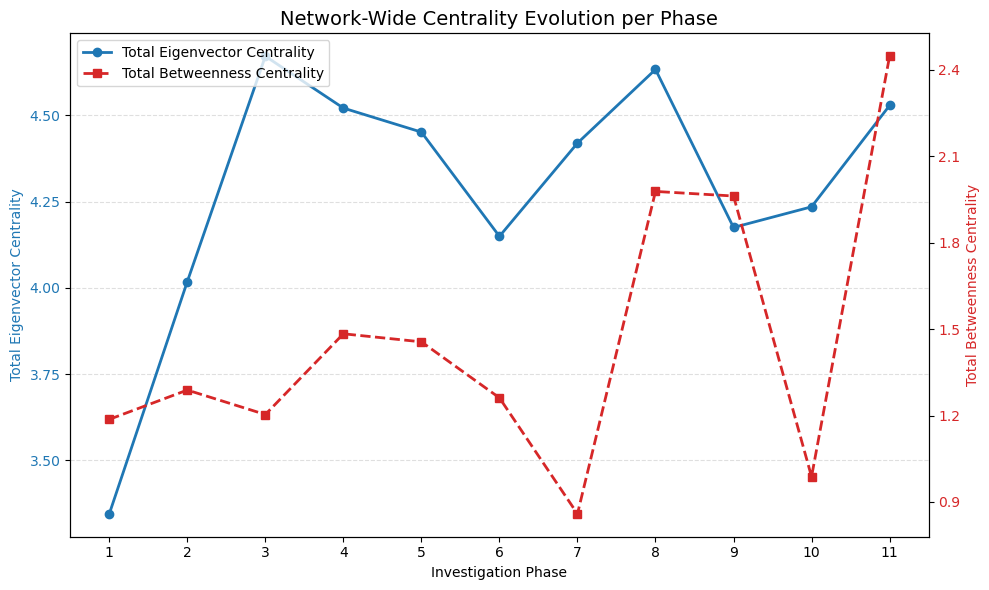

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- Compute total centrality per phase ---
total_eigen = df_eig.sum(axis=0)
total_betweenness = df_bet.sum(axis=0)

# Ensure correct order of phases
phases_list = list(range(1, 12))
eigen_values = [total_eigen[f'Phase {i}'] for i in phases_list]
betweenness_values = [total_betweenness[f'Phase {i}'] for i in phases_list]

# --- Create the dual-axis figure ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y-axis: Eigenvector Centrality (solid blue line)
color_eigen = 'tab:blue'
ax1.set_xlabel('Investigation Phase')
ax1.set_ylabel('Total Eigenvector Centrality', color=color_eigen)
ax1.plot(phases_list, eigen_values, color=color_eigen, marker='o', linewidth=2,
         linestyle='-', label='Total Eigenvector Centrality')
ax1.tick_params(axis='y', labelcolor=color_eigen)
ax1.grid(axis='y', linestyle='--', alpha=0.4)

ax1.set_xticks(phases_list)

# Right Y-axis: Betweenness Centrality (dashed red line)
ax2 = ax1.twinx()
color_bet = 'tab:red'
ax2.set_ylabel('Total Betweenness Centrality', color=color_bet)
ax2.plot(phases_list, betweenness_values, color=color_bet, marker='s', linewidth=2,
         linestyle='--', label='Total Betweenness Centrality')
ax2.tick_params(axis='y', labelcolor=color_bet)

# Format tick marks
ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

# Add a combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# --- Title and layout ---
plt.title('Network-Wide Centrality Evolution per Phase', fontsize=14)
fig.tight_layout()
plt.show()



Calculating HITS scores for Phase 1...
Calculating HITS scores for Phase 2...
Calculating HITS scores for Phase 3...
Calculating HITS scores for Phase 4...
Calculating HITS scores for Phase 5...
Calculating HITS scores for Phase 6...
Calculating HITS scores for Phase 7...
Calculating HITS scores for Phase 8...
Calculating HITS scores for Phase 9...
Calculating HITS scores for Phase 10...
Calculating HITS scores for Phase 11...
✅ Finished calculating Hubs and Authority scores.


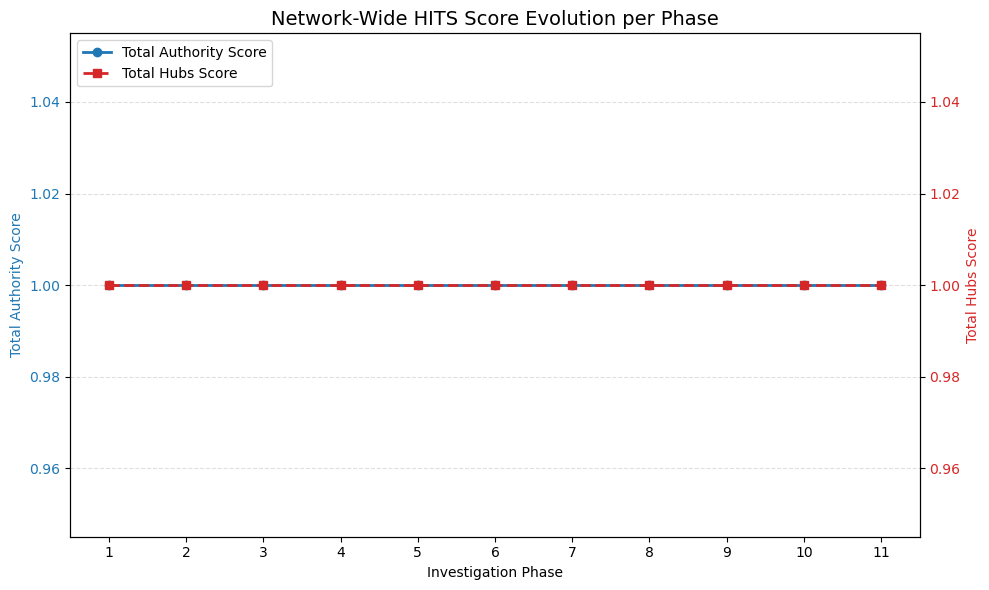

In [31]:
authority_all = {}
hubs_all = {}
for i in range(1, 12):
    print(f"Calculating HITS scores for Phase {i}...")
    G_i = G[i]
    
    # HITS Centrality
    try:
        # hubs_scores y authority_scores son diccionarios
        hubs_scores, authority_scores = nx.hits(G_i, max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        print(f"⚠️ HITS calculation did not converge for Phase {i}")
        hubs_scores = {node: None for node in G_i.nodes()}
        authority_scores = {node: None for node in G_i.nodes()}
    
    # Guardar en los diccionarios
    hubs_all[i] = hubs_scores
    authority_all[i] = authority_scores

print("✅ Finished calculating Hubs and Authority scores.")

# --- 2. Convertir a DataFrames ---
# Convertir Authority a DataFrame
df_auth = pd.DataFrame(authority_all).fillna(0)
df_auth.index.name = "Node"
df_auth.columns = [f"Phase {i}" for i in range(1, 12)]

# Convertir Hubs a DataFrame
df_hubs = pd.DataFrame(hubs_all).fillna(0)
df_hubs.index.name = "Node"
df_hubs.columns = [f"Phase {i}" for i in range(1, 12)]

# --- 3. Calcular la Centralidad Total por Fase ---
total_auth = df_auth.sum(axis=0)
total_hubs = df_hubs.sum(axis=0)

# Asegurar el orden correcto de las fases
phases_list = list(range(1, 12))
auth_values = [total_auth[f'Phase {i}'] for i in phases_list]
hubs_values = [total_hubs[f'Phase {i}'] for i in phases_list]

# --- 4. Crear el Gráfico de Doble Eje ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Eje Y Izquierdo: Total Authority Score (línea azul sólida)
color_auth = 'tab:blue'
ax1.set_xlabel('Investigation Phase')
ax1.set_ylabel('Total Authority Score', color=color_auth)
ax1.plot(phases_list, auth_values, color=color_auth, marker='o', linewidth=2,
          linestyle='-', label='Total Authority Score')
ax1.tick_params(axis='y', labelcolor=color_auth)
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# 🔥 Asegura que se muestren todas las fases en el eje X 🔥
ax1.set_xticks(phases_list)

# Eje Y Derecho: Total Hubs Score (línea roja discontinua)
ax2 = ax1.twinx()
color_hubs = 'tab:red'
ax2.set_ylabel('Total Hubs Score', color=color_hubs)
ax2.plot(phases_list, hubs_values, color=color_hubs, marker='s', linewidth=2,
          linestyle='--', label='Total Hubs Score')
ax2.tick_params(axis='y', labelcolor=color_hubs)

# Formatear la ubicación de los ticks Y
ax1.yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

# Agregar una leyenda combinada
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# --- Título y diseño ---
plt.title('Network-Wide HITS Score Evolution per Phase', fontsize=14)
fig.tight_layout()
plt.show()

✅ DataFrames creados y listos para graficar.

DataFrame Actor n1 (primeras 5 filas):
         Authority Score  Hub Score
Fase                               
Phase 1            0.422      0.079
Phase 2            0.673      0.006
Phase 3            0.360      0.043
Phase 4            0.361      0.041
Phase 5            0.431      0.031

DataFrame Actor n3 (primeras 5 filas):
         Authority Score  Hub Score
Fase                               
Phase 1            0.094      0.095
Phase 2            0.086      0.056
Phase 3            0.085      0.051
Phase 4            0.089      0.050
Phase 5            0.084      0.059


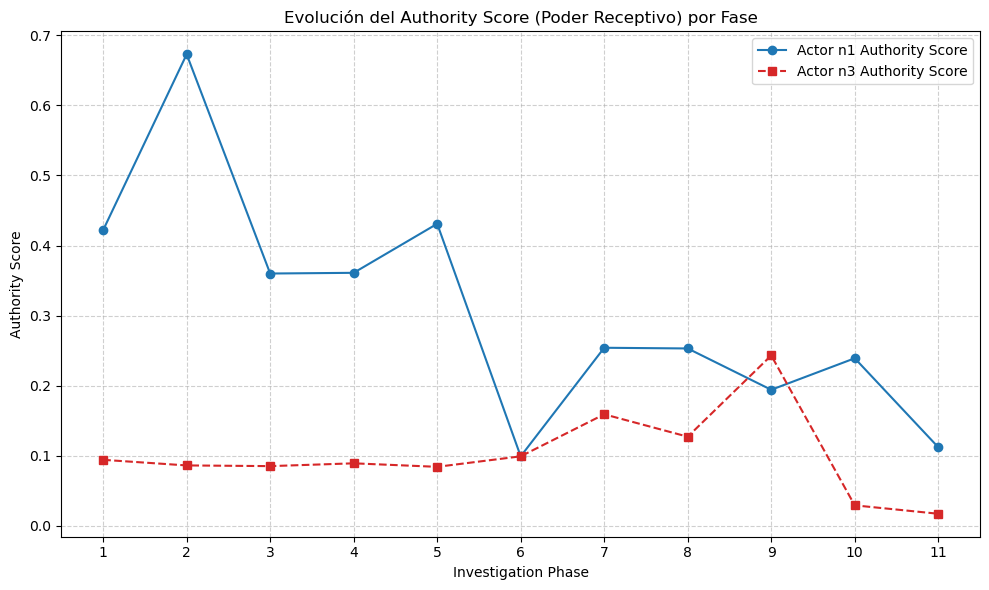

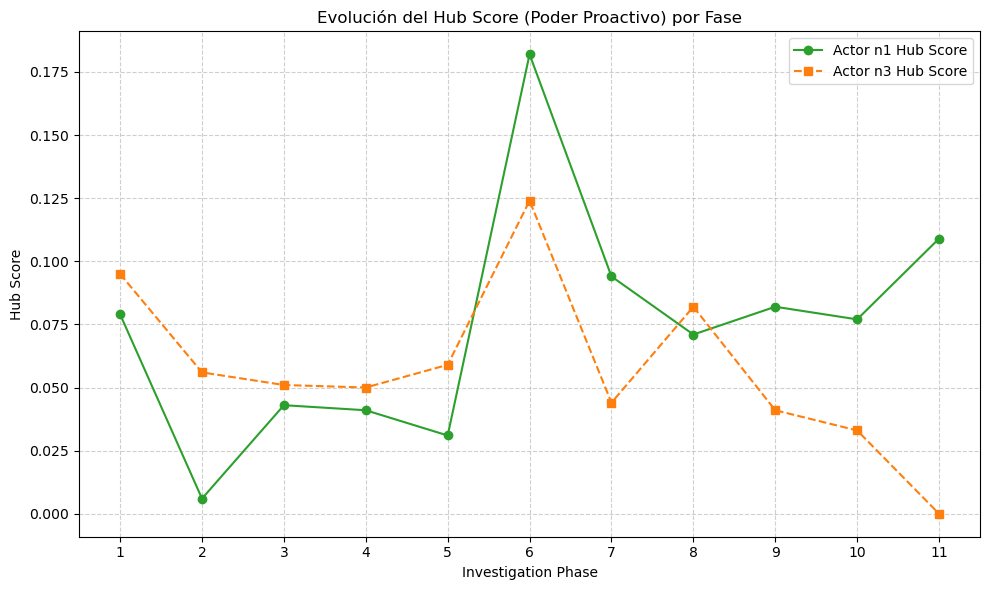

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Definición de los datos ---

# Datos del Actor n1
data_n1 = {
    'Fase': [f'Phase {i}' for i in range(1, 12)],
    'Authority Score': [0.422, 0.673, 0.360, 0.361, 0.431, 0.099, 0.254, 0.253, 0.194, 0.239, 0.112],
    'Hub Score': [0.079, 0.006, 0.043, 0.041, 0.031, 0.182, 0.094, 0.071, 0.082, 0.077, 0.109]
}

# Datos del Actor n3
data_n3 = {
    'Fase': [f'Phase {i}' for i in range(1, 12)],
    'Authority Score': [0.094, 0.086, 0.085, 0.089, 0.084, 0.099, 0.159, 0.127, 0.243, 0.029, 0.017],
    'Hub Score': [0.095, 0.056, 0.051, 0.050, 0.059, 0.124, 0.044, 0.082, 0.041, 0.033, -0.000]
}

# --- 2. Creación y Etiquetado de DataFrames ---

# Crear DataFrames
df_n1 = pd.DataFrame(data_n1)
df_n3 = pd.DataFrame(data_n3)

# La columna 'Fase' es el índice de las filas
df_n1 = df_n1.set_index('Fase')
df_n3 = df_n3.set_index('Fase')

# Extraer solo los números de fase para el eje X de los gráficos
phases_num = list(range(1, 12)) 

print("✅ DataFrames creados y listos para graficar.")
print("\nDataFrame Actor n1 (primeras 5 filas):")
print(df_n1.head())
print("\nDataFrame Actor n3 (primeras 5 filas):")
print(df_n3.head())

# -----------------------------------------------------
## 📊 Gráfico 1: Evolución del Authority Score
# -----------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(phases_num, df_n1['Authority Score'], marker='o', linestyle='-', label='Actor n1 Authority Score', color='tab:blue')
plt.plot(phases_num, df_n3['Authority Score'], marker='s', linestyle='--', label='Actor n3 Authority Score', color='tab:red')

plt.title('Evolución del Authority Score (Poder Receptivo) por Fase')
plt.xlabel('Investigation Phase')
plt.ylabel('Authority Score')

# Forzar los ticks del eje X a mostrar cada fase
plt.xticks(phases_num) 

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# -----------------------------------------------------
## 🚀 Gráfico 2: Evolución del Hub Score
# -----------------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(phases_num, df_n1['Hub Score'], marker='o', linestyle='-', label='Actor n1 Hub Score', color='tab:green')
plt.plot(phases_num, df_n3['Hub Score'], marker='s', linestyle='--', label='Actor n3 Hub Score', color='tab:orange')

plt.title('Evolución del Hub Score (Poder Proactivo) por Fase')
plt.xlabel('Investigation Phase')
plt.ylabel('Hub Score')

# Forzar los ticks del eje X a mostrar cada fase
plt.xticks(phases_num)

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()